
# Práctica 3: Metaheurísticas basadas en poblaciones - Algoritmos Genéticos

<center><h3>
    Raúl José Salgado García
</h3></center>


## Instrucciones

Esto es **Jupyter Notebook**, un documento que integra código Python en un archivo Markdown.
Esto nos permite ir ejecutando celdas de código poco a poco, así como generar automáticamente un informe bien formateado de la práctica.

Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**

Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guión hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guión, responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los cuestionarios"**. Por favor, no modifiques ninguna linea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

IMPORTANTE: Escribe el código de tu o tus soluciones/respuestas en las celdas que se indican para ello. Además, a lo largo de la práctica se plantearán varias preguntas que debéis responder en la parte inferior del documento, incluyendo las celdas que veáis necesarias (si hacéis referencia a partes concretas de vuestro código, etc) para reponder a ellas.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_Geneticos.zip` que contenga los seguientes ficheros:

 * `APELIDOS_NOME_Geneticos.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_Geneticos.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problema utilizados en la resolución.


## Preliminares adicionales sobre Python


Para esta práctica, te sugerimos algunas funciones de paquetes que pueden resultarte útiles en la realización de esta práctica.

Has visto que cuando realizas laboratorios y pruebas para ajustar parámetros resulta necesario tener una estimación del tiempo invertido en la ejecución. Eso ayuda a valorar el balance del tiempo computacional frente a la inclusión de valores de parámetros en el laboratorio. En ese sentido, puede resultar conveniente añadir barras de progreso que además te permitan visualizar el progreso de resolución de las iteraciones. Para ese propósito podéis hacer uso del paquete `tqdm` (https://tqdm.github.io/). 

Puedes ver ejemplos en detalle descritos en https://towardsdatascience.com/progress-bars-for-python-with-tqdm-4dba0d4cb4c

Veámos un ejemplo ilustrativo aquí.

In [1]:
# solo debes importarlo una vez en el notebook.
# fíjate que estamos importando del paquete tqdm.notebook para que incorpore los decoradores compatibles en Jupyter 
# (en Python podrías importar simplemente desde el paquete tdqm)
from tqdm.notebook import trange, tqdm

`tqdm` permite añadir una barra de progreso que informe sobre el tiempo y el paso de iteraciones. En el ejemplo, la variable `nit` son el número de iteraciones a realizar y para conseguir que se visualize el progreso se pasa a `tqdm` un iterador de rango.

In [2]:
from random import randint

heads = 0
tails = 0
nit=1000000
for i in tqdm(range(nit), desc='Coin Flip Progress'):
    toss = randint(0, 1)
    if toss == 0:
        heads += 1
    else:
        tails += 1

Coin Flip Progress:   0%|          | 0/1000000 [00:00<?, ?it/s]

El paquete nos ofrece la posibilidad combinar `tdqm(range(NUM_IT))` en una única función, llamada `trange(NUM_IT)`. Veamos su funcionamiento en el siguiente ejemplo, que muestra también cómo podemos hacer cuando necesitamos llevar cuenta del progreso en bucles anidados.

In [3]:
num_games = 3

for game in trange(num_games, desc='Overall Progress'):
    heads = 0
    tails = 0
    nit=1000000
    for j in trange((nit), desc=f'Game {game+1} Progress'):
        toss = randint(0, 1)
        if toss == 0:
            heads += 1
        else:
            tails += 1
            
    print(f'Heads: {heads}, Tails: {tails}')


Overall Progress:   0%|          | 0/3 [00:00<?, ?it/s]

Game 1 Progress:   0%|          | 0/1000000 [00:00<?, ?it/s]

Heads: 500683, Tails: 499317


Game 2 Progress:   0%|          | 0/1000000 [00:00<?, ?it/s]

Heads: 499727, Tails: 500273


Game 3 Progress:   0%|          | 0/1000000 [00:00<?, ?it/s]

Heads: 500309, Tails: 499691


Aprovechamos para recordarte que puedes utilizar semillas en la generación de secuencias de números aleatorios para hacer determinista y más verificable tu implementación. 

In [4]:
import random
import time

In [5]:
# este vector será aleatorio si no habíamos establecido una semilla previamente.
# Podríamos tener incluso una semilla basada en el tiempo actual para forzar que se aleatorice 
# si ejecutamos esta celda múltiples veces
random.seed(time.time())

vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

# aquí establecemos una semilla totalmente fija
# que no depende del tiempo y por tanto está bajo nuestro control
semilla = 123456
random.seed (semilla)

# este viene determinado por la semilla
vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

# y ahora somos capaces de generar la misma serie "aleatoria"
random.seed (semilla)
vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio igual que el anterior", vector_aleatorio)


vector aleatorio  [8, 5, 4, 10, 9, 8, 1, 4, 2]
vector aleatorio  [5, 1, 3, 1, 2, 1, 5, 1, 2]
vector aleatorio igual que el anterior [5, 1, 3, 1, 2, 1, 5, 1, 2]


Esto puede ser útil para verificar que siempre obtienes los mismos resultados ante el mismo conjunto de entradas.

## El Problema del Viajante de Comercio (VC) con Algoritmos Genéticos

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheurística (MH) de poblaciones conocida como Algoritmo Genético (GA, del inglés *Genetic  Algorithm*). Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás si la introducción de modificaciones en el diseño del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.


### Definición del problema de Viajante de Comercio (VC)


La definición del problema sigue la descripción ya vista en las prácticas anterior, en la que se disponía de una represetación del problema mediante un grafo ponderado. Así que, en primer lugar importa el módulo Python que acompaña esta práctica, que ya trae las funciones de apoyo como la clase `Localizaciones` que implementaba la carga de datos y que utilizaba una matriz de adyacencia.

In [2]:
from helpers_mod_ga import *
import random
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tqdm.notebook import trange, tqdm
import time

Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km para el problema de las 8 ciudades gallegas.

In [3]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')
g2=Localizaciones(filename='./data/US120.txt')
print (g1.distancia(0,1))

55.88273580792048



## P3.1: Implementación básica de Algoritmo Genético



Implementa un algoritmo genético básico para resolver el problema del VC, siguiendo la descripción algorítmica de la MH vista en la clase expositiva.

Ten en cuenta las siguientes consideraciones de diseño para completar esta implementación básica:
- Representación  de  las  soluciones:  representación  de  orden  (permutaciones) comenzando y finalizando en la ciudad 0. 

- Población inicial: inicialización completamente aleatoria de la población inicial, que sean permutaciones válidas.

- Operador de cruce: Order Crossover (OX). La función/método que se encargue de hacer el cruce ordenado debe aceptar como parámetros la probabilidad de cruce (por defecto, establecida a pc=0.95), los dos puntos de corte así como los cromosomas sobre los que actuar.

- Operador de mutación: se utilizará el operador de intercambio, aplicado con una probabilidad de mutación. Vuestra implementación debe manejar dos variantes de esta función:
    - Mutación individual: solo se aplica la mutación, si procede, sobre un único gen en el cromosoma. La probabilidad de mutación por defecto se establece pm=0.25. Esta función debería recibir el índice del gen sobre el que actuar además de la probabilidad de mutación y el cromosoma original.
    - Mutación cromosómica: se aplica la mutación contemplando todo el cromosoma, de forma que individualmente puede mutar cada gen de manera independiente según una probabilidad de mutación, establecida por defecto a pm=0.01.

- El reemplazo de la generación debe seguir un modelo de reemplazo generacional con elitismo. En particular, tu implementación debe disponer de dos variantes de la función de reemplazo:
    - mitades: haz que la mitad de la población resultante del reemplazo provenga de la generación actual mientras que la otra mitad provenga de los descendientes, tomando en ambos casos los mejores individuos. 
    - elitismo "elite=2": de esta forma, hay que mantener los 2 mejores individuos de la generación actual/ancestros; mientras que el resto provienen de entre los mejores hijos. La función de reemplazo debería parametrizar "elite".
    
Ambas variantes deben recibir como parámetro la lista de cromosomas de las poblaciones ascentros e hijos generados y retornar la población resultante.
    

- Condición de parada simple basado en un número de iteraciones máximo pasado como parámetro.

- La implementación debe ser completamente parametrizable, de forma que todos los componentes susceptibles de ser ajustados mediante parámetros deberían puedan ser establecidos en cada ejecución/problema.


Lanza varias ejecuciones para verificar que puede resolver el problema con los siguientes grafos de
ejemplo:
- grafo 8 ciudades gallegas (`data/grafo8cidades.txt`), con una población de 2 individuos y 150 iteraciones.
- grafo 120 ciudades estadounidenses (`data/US120.txt`), con una población de 32 individuos y 500 iteraciones.


Si no te convergiera, prueba a extender el número de iteraciones o variar parámetros como la probabilidad de mutación.



In [100]:
#Esta función implementa el algoritmo de búsqueda genetica utilizando las funciones definidas más abajo
def busqueda_genetica(NUM_ITS, TAM_POB, MAPA, PM, PC=0.95, k=3, MITAD=True, TODOS=False, elite=None, DEBUG=False):
    s_mejor = 0
    coste_mejor = 0
    
    poblacion = genera_poblacion_inicial(TAM_POB, MAPA)
    
    s_mejor, coste_mejor = obtener_mejor(poblacion)
    s_act = 0
    coste_act = 0
    
    #DEBUG
    its_sin_mejora = 0
    

    for i in trange(NUM_ITS, desc='Overall Progress'): #Para mostrar el progreso 
    #for i in range(NUM_ITS):
        
        padres = seleccion_poblacion_torneo(TAM_POB, poblacion,k=3) #seleccion
        descendientes = cruce(padres, PC) #cruce
        descendientes = mutacion(descendientes, TODOS, PM) #mutacion
        descendientes = evaluacion_poblacion(descendientes,MAPA) #introducimos costes y ordenamos
        
        poblacion = reemplazo(descendientes, poblacion, MITAD, elite=elite) #reemplazamos segun método
        
        poblacion = ordenar(poblacion) #ordenamos
        
        #Tomamos el mejor elemento y evaluamos si es mejor que las soluciones que teníamos hasta el momento
        s_act, coste_act = obtener_mejor(poblacion)
        
        if (coste_mejor > coste_act):
            s_mejor = s_act
            coste_mejor = coste_act
            #DEBUG
            if DEBUG == True:
                print(coste_mejor, i) #Imprimimos la mejor encontrada
            its_sin_mejora = 0
        #DEBUG
        else:
            its_sin_mejora+=1
            
        if(its_sin_mejora == 100):
            its_sin_mejora
            #if DEBUG == True:
                #print(poblacion)
    
    return s_mejor

#Genera una poblacion inicial de manera aleatoria y la ordena por coste
def genera_poblacion_inicial(TAM_POB, MAPA):
    poblacion = []
    for i in range(TAM_POB):
        solucion = [i for i in range(1,MAPA.nciudades)]
        random.shuffle(solucion)
        poblacion.append([tuple(solucion),funcion_coste(solucion, MAPA)])
        
        poblacion = sorted(poblacion, key=lambda x: x[1])
    
    return poblacion

#Ordena la poblacion de menor a mayor por coste
def ordenar(poblacion):
    return sorted(poblacion, key=lambda x: x[1])

#Añade a cada elemento de la poblacion su valor de coste pob = [[elem,coste], [elem,coste]...]
def evaluacion_poblacion(poblacion, MAPA):
    for i in range(len(poblacion)):
        poblacion[i] = [poblacion[i],funcion_coste(poblacion[i], MAPA)]
        
    poblacion = sorted(poblacion, key=lambda x: x[1])
        
    return poblacion

#Obtiene el mejor elemento de la poblacion
def obtener_mejor(poblacion):
    solucion = min(poblacion, key=lambda x: x[1])
    return solucion[0],solucion[1]

#Metodo de selección aleatoria
def seleccion_poblacion_aleatoria(TAM_POB, poblacion):
    seleccion = []
    for i in range(int(TAM_POB/2)):
        padre1, padre2 = dos_aleatorios(len(poblacion))
        seleccion.append(poblacion[padre1][0])
        seleccion.append(poblacion[padre2][0])
        
    return seleccion

#metodo de seleccion por torneo con parámetro k, tomando k elementos aleatorios y cogiendo el mejor
def seleccion_poblacion_torneo(TAM_POB, poblacion, k):
    seleccion = []
    for i in range(TAM_POB):
        aspirantes = random.choices(poblacion, k=k)
        seleccion.append(min(aspirantes, key=lambda x: x[1])[0])
    
    return seleccion

#metodo de seleccion de ruleta, dando probabilidades de elección proporcionales a su coste (cuanto menor mayor probabilidad)
def seleccion_poblacion_ruleta(TAM_POB, poblacion):
    total_coste = sum(1 / elemento[1] for elemento in poblacion)
    probabilidades = [1 / (elemento[1] * total_coste) for elemento in poblacion]
    
    eleccion = random.choices(poblacion, weights=probabilidades, k=TAM_POB)
    
    seleccion = [x[0] for x in eleccion]
    
    return seleccion
    #return probabilidades

#metodo de seleccion de orden lineal, probabilidad de elección proporcional a su posicion en la lista ordenada por coste
def seleccion_poblacion_lineal(TAM_POB, poblacion):
    total_elementos = len(poblacion)
    probabilidades = [1 / (i + 1) for i in range(total_elementos)]
    
    # Normalizar las probabilidades para que sumen 1
    suma_probabilidades = sum(probabilidades)
    probabilidades = [prob / suma_probabilidades for prob in probabilidades]
    
    # Seleccionar un elemento basado en las probabilidades
    seleccionados = random.choices(poblacion, weights=probabilidades, k=TAM_POB)
    
    seleccionados = [x[0] for x in seleccionados]
    
    return seleccionados
    #return probabilidades
        
#generar x números aleatorios diferentes
def x_aleatorios(x, limit):
    aleatorios = []
    duplicado = False
    aleatorios.append(random.randint(0,limit-1))
    for i in range(x-1):
        while True:
            siguiente = random.randint(0,limit-1)
            duplicado = False
            for aleatorio in aleatorios:
                if aleatorio == siguiente:
                    duplicado = True
                    break
            if duplicado == False:
                aleatorios.append(siguiente)
                break
    
    return aleatorios
        
    
#cruza dos pares en dos puntos determinados con una probabilidad pc
def cruce_pares(par1, par2, corte1, corte2, PC):
    #Primero evaluamos la probabilidad de cruzar
    if random.uniform(0,1)>PC:
        return par1, par2
    
    
    
    cruzado1 = [0 for i in range(len(par1))]
    cruzado2 = [0 for i in range(len(par1))]
    
    
    
    cruzado1[corte1:corte2] = par2[corte1:corte2]
    cruzado2[corte1:corte2] = par1[corte1:corte2]
    
    
    i=0
    j=0
    while True:
        
        
        
        if par1[(corte2+i)%len(cruzado1)] not in cruzado1:
            cruzado1[(corte2+j)%len(cruzado1)] = par1[(corte2+i)%len(cruzado1)]
            j+=1
        
        if ((corte2+j)%len(cruzado1)) == corte1:
            break
        
        i+=1
        
    i=0
    j=0
    while True:
        
        if par2[(corte2+i)%len(cruzado2)] not in cruzado2:
            cruzado2[(corte2+j)%len(cruzado2)] = par2[(corte2+i)%len(cruzado2)]
            j+=1
        
        if ((corte2+j)%len(cruzado2)) == corte1:
            break
        
        i+=1
    
    
    
    return cruzado1, cruzado2

#toma los elementos de la población de 2 en 2 y los cruza determinando unos puntos de corte
def cruce(seleccion, PC):
    descendientes = []
    for i in range(0, len(seleccion), 2):
        corte1, corte2 = dos_aleatorios(len(seleccion[i]))
        
        #print("Seleccionados: ", seleccion[i], seleccion[i+1])
        #print("Cortes: ", corte1, corte2)
        
        if corte1 < corte2:
            cruzado1, cruzado2 = cruce_pares(seleccion[i],seleccion[i+1], corte1, corte2, PC)
        else:
            cruzado1, cruzado2 = cruce_pares(seleccion[i],seleccion[i+1], corte2, corte1, PC)
        
        
        
        #cruzado1, cruzado2 = cruce_pares(seleccion[i],seleccion[i+1], corte1, corte2, PC)
        
        #print("Cruzados: ", cruzado1, cruzado2)
        
        descendientes.append(cruzado1)
        descendientes.append(cruzado2)
        
    return descendientes

#función para obtener dos números aleatorios diferentes
def dos_aleatorios(limit):
    rand1 = random.randint(0,limit-1)
    while True:
        rand2 = random.randint(0,limit-1)
        if rand1!=rand2:
            break
    
    return rand1, rand2

#Función para calcular la mutación con una probabilidad
#Si ind1 es -1, calculamos los dos, sino solo el segundo
def mutacion_individual(cromosoma, ind1, PM):
    if random.uniform(0,1)>PM:
        return cromosoma
    

    if ind1 == -1:
        ind1, ind2 = dos_aleatorios(len(cromosoma))
    else:
        while True:
            ind2 = random.randint(0,len(cromosoma)-1)
            if ind1 != ind2:
                break
    
    cromosoma[ind1], cromosoma[ind2] = cromosoma[ind2], cromosoma[ind1]
    
    return cromosoma

#Mutamos cada cromosoma según el método que indique TODOS. 
def mutacion(padres, TODOS, PM):
    mutados = []
    
    for cromosoma in padres:
        
        if TODOS == False:
            mutado = mutacion_individual(list(cromosoma), -1, PM)
            mutados.append(mutado)
        else:
            mutado = list(cromosoma)
            for i in range(len(cromosoma)):
                mutado = mutacion_individual(mutado, i, PM)
            mutados.append(mutado)
        
    
    return mutados

#Pob = mitad(pobactual) + mitad(descendientes)
def reemplazo_mitad(descendientes, padres):
    MITAD_POB = int(len(descendientes)/2)
    
    return padres[:MITAD_POB] + descendientes[:MITAD_POB]

#Pob = elitemejores(pobactual) + total-elitemejores(descendientes)
def reemplazo_elitista(descendientes, padres, elite):
    TAM_POB = int(len(descendientes))
    
    return padres[:elite] + descendientes[:TAM_POB-elite]
            
            
#utiliza una u otra función de reemplazo
def reemplazo(descendientes, padres, MITAD, elite=None):
    if MITAD==True:
        return reemplazo_mitad(descendientes, padres)
    else:
        return reemplazo_elitista(descendientes, padres, elite)
        

#Devuelve el coste de una solución dada (s) recorriendo la lista y sumando el coste de cada paso
def funcion_coste(s, mapa):
    cost_tot = 0
    cost_tot += mapa.distancia(0,s[0])
    for i in range(len(s)-1):
        cost_tot += mapa.distancia(s[i], s[i+1])
    cost_tot += mapa.distancia(s[len(s)-1], 0)
    return cost_tot

In [8]:
#Primera prueba mapa 8
solucion = busqueda_genetica(150, 2, g1, 0.25, 0.95, MITAD=True, TODOS=False)
print(solucion, funcion_coste(solucion, g1))

[1, 2, 3, 4, 5, 6, 7] 381.6699617675482


In [12]:
#Primera prueba mapa 120
solucion = busqueda_genetica(500, 32, g2, 0.25, 0.95, MITAD=True, TODOS=False)
print(solucion, funcion_coste(solucion, g2))

Overall Progress:   0%|          | 0/500 [00:00<?, ?it/s]

[47, 60, 34, 92, 69, 83, 100, 90, 68, 80, 82, 26, 75, 41, 11, 14, 58, 66, 7, 20, 73, 88, 4, 42, 64, 62, 23, 25, 9, 111, 108, 57, 29, 95, 72, 31, 46, 97, 48, 104, 70, 17, 79, 32, 43, 101, 10, 74, 21, 56, 5, 39, 15, 118, 87, 33, 85, 45, 76, 116, 115, 61, 117, 52, 103, 96, 49, 86, 27, 93, 53, 84, 37, 2, 71, 18, 67, 19, 112, 54, 77, 114, 51, 44, 30, 102, 6, 12, 106, 1, 99, 98, 105, 59, 35, 16, 94, 40, 89, 119, 8, 81, 109, 13, 50, 3, 65, 28, 55, 63, 24, 113, 110, 22, 107, 38, 36, 91, 78] 66405.62860312827


Overall progress:   0%|          | 0/100 [00:00<?, ?it/s]

Mínimo coste:  [[7, 6, 5, 4, 3, 2, 1], 381.6699617675482]
Proporcion:  0.25
Coste medio:  435.36471456591767


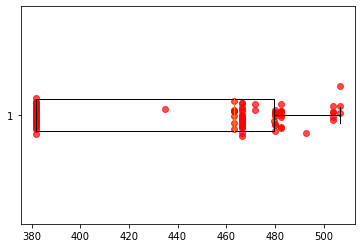

In [39]:
#Verificación: repetición mapa de 8 para ver que consigue la mejor solución. 
soluciones = []
for i in trange(100, desc='Overall progress'):
    soluciones.append([busqueda_genetica(150, 2, g1, 0.25, 0.95, MITAD=True, TODOS=False, DEBUG=False),0])
    soluciones[i][1] = funcion_coste(soluciones[i][0], g1)
    
print("Mínimo coste: ", min(soluciones, key=lambda x: x[1]))
print("Proporcion: ", sum(1 for costemin in soluciones if costemin == min(soluciones, key=lambda x: x[1])) / 100)
print("Coste medio: ", sum([solucion[1] for solucion in soluciones]) / 100)

#Ahora imprimimos un boxplot para ver las soluciones encontradas
costes = [solucion[1] for solucion in soluciones]
plt.boxplot(costes, vert=False)
y = np.random.normal(1,0.04, len(costes))
plt.scatter(costes, y, color = 'red', alpha = 0.7)
plt.show()

Overall progress:   0%|          | 0/20 [00:00<?, ?it/s]

Mínimo coste:  [[11, 26, 52, 117, 25, 103, 54, 1, 115, 39, 45, 6, 30, 57, 97, 48, 76, 102, 44, 29, 116, 87, 104, 46, 111, 9, 70, 73, 96, 17, 92, 41, 14, 113, 2, 81, 69, 64, 55, 24, 23, 60, 88, 31, 85, 33, 108, 112, 95, 72, 5, 106, 19, 118, 61, 67, 12, 7, 37, 84, 66, 94, 18, 93, 27, 75, 63, 34, 20, 56, 3, 86, 65, 21, 53, 28, 16, 98, 105, 42, 91, 78, 114, 22, 59, 4, 36, 89, 83, 71, 35, 50, 110, 74, 82, 80, 10, 43, 40, 38, 32, 77, 107, 51, 109, 99, 15, 47, 49, 62, 58, 8, 119, 100, 90, 68, 101, 79, 13], 52871.88589832005]
Proporcion:  0.05
Coste medio:  64089.88525472976


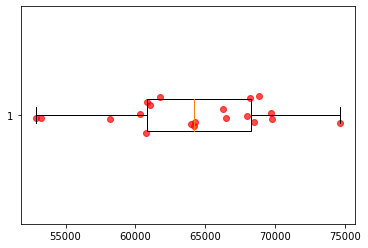

In [50]:
#SELECCION ALEATORIA
soluciones = []
for i in trange(20, desc='Overall progress'):
    soluciones.append([busqueda_genetica(500, 32, g2, 0.25, 0.95, MITAD=True, TODOS=False, DEBUG=False),0])
    soluciones[i][1] = funcion_coste(soluciones[i][0], g2)
    
print("Mínimo coste: ", min(soluciones, key=lambda x: x[1]))
print("Proporcion: ", sum(1 for costemin in soluciones if costemin == min(soluciones, key=lambda x: x[1])) / 20)
print("Coste medio: ", sum([solucion[1] for solucion in soluciones]) / 20)

#Ahora imprimimos un boxplot para ver las soluciones encontradas
costes = [solucion[1] for solucion in soluciones]
plt.boxplot(costes, vert=False)
y = np.random.normal(1,0.04, len(costes))
plt.scatter(costes, y, color = 'red', alpha = 0.7)
plt.show()

Overall progress:   0%|          | 0/20 [00:00<?, ?it/s]

Mínimo coste:  [[11, 26, 24, 92, 96, 34, 60, 110, 82, 83, 2, 71, 42, 38, 40, 94, 18, 28, 27, 47, 70, 31, 104, 72, 95, 15, 99, 98, 19, 9, 25, 73, 117, 64, 84, 80, 78, 91, 109, 89, 37, 4, 50, 66, 3, 35, 36, 55, 52, 88, 46, 108, 48, 29, 103, 17, 20, 93, 58, 10, 114, 77, 79, 22, 100, 90, 68, 32, 43, 51, 119, 13, 81, 69, 62, 63, 86, 65, 56, 1, 106, 12, 7, 41, 75, 21, 23, 14, 113, 105, 74, 16, 59, 53, 87, 85, 30, 102, 44, 45, 6, 118, 67, 115, 39, 57, 97, 76, 116, 111, 49, 33, 54, 112, 5, 61, 8, 107, 101], 60755.54563501656]
Proporcion:  0.05
Coste medio:  65853.12759654324


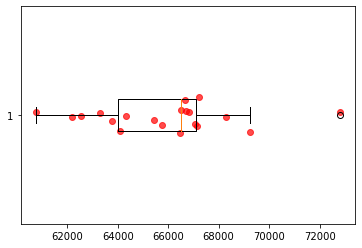

In [52]:
#SELECCION TORNEO 3
soluciones = []
for i in trange(20, desc='Overall progress'):
    soluciones.append([busqueda_genetica(500, 32, g2, 0.25, 0.95, MITAD=True, TODOS=False, DEBUG=False),0])
    soluciones[i][1] = funcion_coste(soluciones[i][0], g2)
    
print("Mínimo coste: ", min(soluciones, key=lambda x: x[1]))
print("Proporcion: ", sum(1 for costemin in soluciones if costemin == min(soluciones, key=lambda x: x[1])) / 20)
print("Coste medio: ", sum([solucion[1] for solucion in soluciones]) / 20)

#Ahora imprimimos un boxplot para ver las soluciones encontradas
costes = [solucion[1] for solucion in soluciones]
plt.boxplot(costes, vert=False)
y = np.random.normal(1,0.04, len(costes))
plt.scatter(costes, y, color = 'red', alpha = 0.7)
plt.show()

Overall progress:   0%|          | 0/20 [00:00<?, ?it/s]

Mínimo coste:  [[99, 98, 27, 60, 9, 20, 19, 118, 87, 54, 31, 72, 115, 67, 12, 66, 86, 52, 117, 73, 96, 46, 104, 25, 34, 21, 84, 69, 50, 105, 36, 32, 51, 113, 2, 13, 22, 114, 77, 101, 89, 42, 53, 59, 29, 30, 45, 6, 44, 102, 39, 106, 1, 15, 61, 93, 23, 92, 111, 88, 70, 103, 33, 108, 85, 95, 112, 97, 48, 57, 76, 116, 5, 7, 4, 35, 18, 3, 64, 74, 37, 75, 17, 49, 47, 62, 24, 26, 11, 14, 83, 78, 80, 82, 41, 55, 16, 71, 81, 109, 79, 10, 68, 90, 40, 38, 8, 119, 91, 100, 43, 107, 94, 28, 56, 65, 63, 58, 110], 55854.027602900154]
Proporcion:  0.05
Coste medio:  64955.68739218799


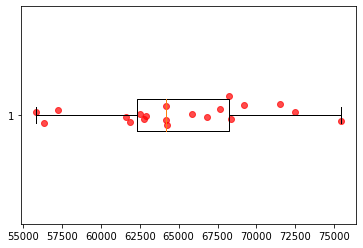

In [54]:
#SELECCION RULETA
soluciones = []
for i in trange(20, desc='Overall progress'):
    soluciones.append([busqueda_genetica(500, 32, g2, 0.25, 0.95, MITAD=True, TODOS=False, DEBUG=False),0])
    soluciones[i][1] = funcion_coste(soluciones[i][0], g2)
    
print("Mínimo coste: ", min(soluciones, key=lambda x: x[1]))
print("Proporcion: ", sum(1 for costemin in soluciones if costemin == min(soluciones, key=lambda x: x[1])) / 20)
print("Coste medio: ", sum([solucion[1] for solucion in soluciones]) / 20)

#Ahora imprimimos un boxplot para ver las soluciones encontradas
costes = [solucion[1] for solucion in soluciones]
plt.boxplot(costes, vert=False)
y = np.random.normal(1,0.04, len(costes))
plt.scatter(costes, y, color = 'red', alpha = 0.7)
plt.show()

Overall progress:   0%|          | 0/20 [00:00<?, ?it/s]

Mínimo coste:  [[48, 33, 85, 108, 45, 6, 102, 44, 29, 5, 111, 49, 25, 34, 98, 18, 60, 9, 47, 41, 52, 24, 63, 62, 11, 58, 42, 74, 2, 8, 114, 77, 109, 40, 117, 103, 96, 104, 95, 72, 31, 20, 66, 59, 113, 21, 55, 75, 70, 19, 73, 88, 17, 92, 23, 26, 50, 64, 3, 93, 28, 27, 86, 65, 15, 112, 54, 7, 56, 53, 35, 16, 116, 39, 76, 30, 57, 97, 46, 87, 118, 12, 67, 61, 105, 100, 90, 68, 107, 10, 101, 79, 78, 51, 119, 81, 89, 69, 110, 14, 94, 99, 115, 106, 1, 38, 43, 32, 37, 84, 71, 36, 4, 83, 82, 13, 91, 22, 80], 56570.53946783065]
Proporcion:  0.05
Coste medio:  63789.004992331786


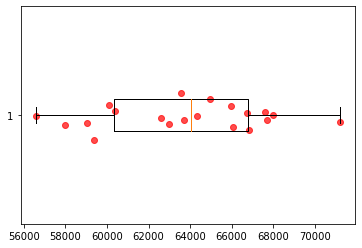

In [56]:
#SELECCION LINEAL
soluciones = []
for i in trange(20, desc='Overall progress'):
    soluciones.append([busqueda_genetica(500, 32, g2, 0.25, 0.95, MITAD=True, TODOS=False, DEBUG=False),0])
    soluciones[i][1] = funcion_coste(soluciones[i][0], g2)
    
print("Mínimo coste: ", min(soluciones, key=lambda x: x[1]))
print("Proporcion: ", sum(1 for costemin in soluciones if costemin == min(soluciones, key=lambda x: x[1])) / 20)
print("Coste medio: ", sum([solucion[1] for solucion in soluciones]) / 20)

#Ahora imprimimos un boxplot para ver las soluciones encontradas
costes = [solucion[1] for solucion in soluciones]
plt.boxplot(costes, vert=False)
y = np.random.normal(1,0.04, len(costes))
plt.scatter(costes, y, color = 'red', alpha = 0.7)
plt.show()

❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, implementación de operadores, etc.). ¿Cuál es el mecanismo de selección escogido para tu implementación? Explica también cómo has verificado tu implementación.

La función `busqueda_genetica` es la que implementa el algoritmo de la práctica. Esta hará uso de todas las funciones definidas a continuación para poder llevar a cabo su cometido. El algoritmo comienza generando una población inicial aleatoria con `genera_poblacion_inicial`. Esta será de tamaño `TAM_POB`, enviado como argumento. Repetiremos la búsqueda `NUM_ITS` veces. Dentro del bucle, primero se hace una selección de la población con `seleccion_poblacion_ruleta`. Los seleccionados pasan por cruce y mutación, utilizando PC y PM, y la variable TODOS, que controla si pueden mutar todos los genes o solo uno de ellos aleatoriamente en cada cromosoma. Según esto se ejecutarán funciones diferentes a partir de mutación. A continuación se utiliza `evaluacion_poblacion` para calcular el coste de cada hijo obtenido, añadiendolo como segundo elemento de cada elemento de los descendientes (descendientes = [[descendiente, coste], [descendiente, coste]...]), y se ordena la lista de menor a mayor coste. Seguidamente se utiliza la función `reemplazo` para obtener la nueva población, teniendo en cuenta la variables `MITAD` para saber si se hace un reemplazo por mitades o elitista (variable `elite`). Finalmente, se ordena la nueva población, se toma el mejor elemento y se ve si se ha llegado a alguna solución mejor a la que ya se tenía. 

El mecanismo de selección utilizado es el método de orden lineal. En este, cada elemento de la población tendrá una probabilidad de ser elegido proporcional a su posición en la lista que contiene a la población ordenada de menor a menor coste. Así, el elemento con menor coste, tendrá mayor probabilidad de ser escogido que el resto. Lo bueno de este mecanismo es que aporta bastante equilibrio entre dar mayor prioridad a los mejores elementos, pero seguir dando oportunidades al resto de elementos. Así, se consigue un buen compromiso entre exploración y explotación del espacio de búsqueda. 

La verificación de la implementación se ha hecho a través del mapa de 8 ciudades. En este, sabemos que el coste óptimo es aproximadamente 382km. Al repetir la ejecución del algoritmo 100 veces para este mapa observamos que se obtiene la solución óptima en un 25% de las ocasiones. El algoritmo está funcionando correctamente porque es capaz de encontrar la solución óptima, y además hacerlo en buena proporción. 

## P3.2: Laboratorio

Como toda metaheurística, resulta crucial conocer cómo afecta en términos prácticos los parámetros
del algoritmo y los operadores desarrollados. Estudia el comportamiento del algoritmo implementado para resolver VC atendiendo a las siguientes cuestiones.


❓ **Pregunta 2**. Realiza el estudio de la calidad de la solución variando el tamaño de la población: 1, 2, 4, 8, 16, 32, 64... ¿Qué valor recomendarías para el problema de las 120 ciudades? ¿Por qué? Ten en cuenta que tienes dos variantes del mecanismo de reemplazo.

❓ **Pregunta 3**. Ahora realiza un estudio similar variando la probabilidad de mutación en el rango 0, ..., 0.95 en pasos de 0.05~0.10. ¿Qué valor recomendarías para este parámetro? ¿Por qué? Ten en cuenta que tienes dos variantes del mecanismo de mutación.

❓ **Pregunta 4**. Finalmente realiza un estudio variando el número de iteraciones máximas en el rango de 50 a 1000, considerando un paso variable o adaptativo a conveniencia. ¿Qué valor recomendarías para este parámetro? ¿Por qué? Realiza una discusión reflexionando sobre los resultados conjuntos de estos tres parámetros. 

Apoya todas tus respuestas en datos-gráficos resultantes de tus estudios, reportados de forma que sea fácil de comparar/contrastar.

Importante: además de la calidad de la soluciones obtenidas, se recomienda medir tiempos para tomar medidas operativas sobre el número de repeticiones que permitan realizar promedios (se recomienda no más de 10 si se ralentiza mucho) y prescindir de manera razonada de valores en las series de ejecución que no sean computacionalmente rentables/viables con tu implementación/ordenador (p.ej., tamaños de población elevados pueden tomar mucho tiempo para resolver).






<h1> PREGUNTA 2 </h1>

❓ Pregunta 2. Realiza el estudio de la calidad de la solución variando el tamaño de la población: 1, 2, 4, 8, 16, 32, 64... ¿Qué valor recomendarías para el problema de las 120 ciudades? ¿Por qué? Ten en cuenta que tienes dos variantes del mecanismo de reemplazo.

In [20]:
#PREGUNTA 2: probaremos con varios tamaños de población, primero solo con el método de mitades.
tams = [2,4,8,16,32,64,128,256]
REPETICIONES = 10

soluciones_totales = []

for i in trange(len(tams)):
    soluciones_parciales = []
    for j in trange(REPETICIONES):
        inicio = time.time()
        soluciones_parciales.append([busqueda_genetica(500, tams[i], g2, 0.25, 0.95, MITAD=True, TODOS=False, DEBUG=False), 0, 0])
        fin = time.time()
        soluciones_parciales[j][1] = funcion_coste(soluciones_parciales[j][0], g2)
        soluciones_parciales[j][2] = fin-inicio
        #print(soluciones_parciales[j][1])
    soluciones_totales.append(soluciones_parciales)
    #print(soluciones_totales)
        
with open('soluciones_totales_tam_pob_mitades.pkl', 'wb') as archivo:
    pickle.dump(soluciones_totales, archivo)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

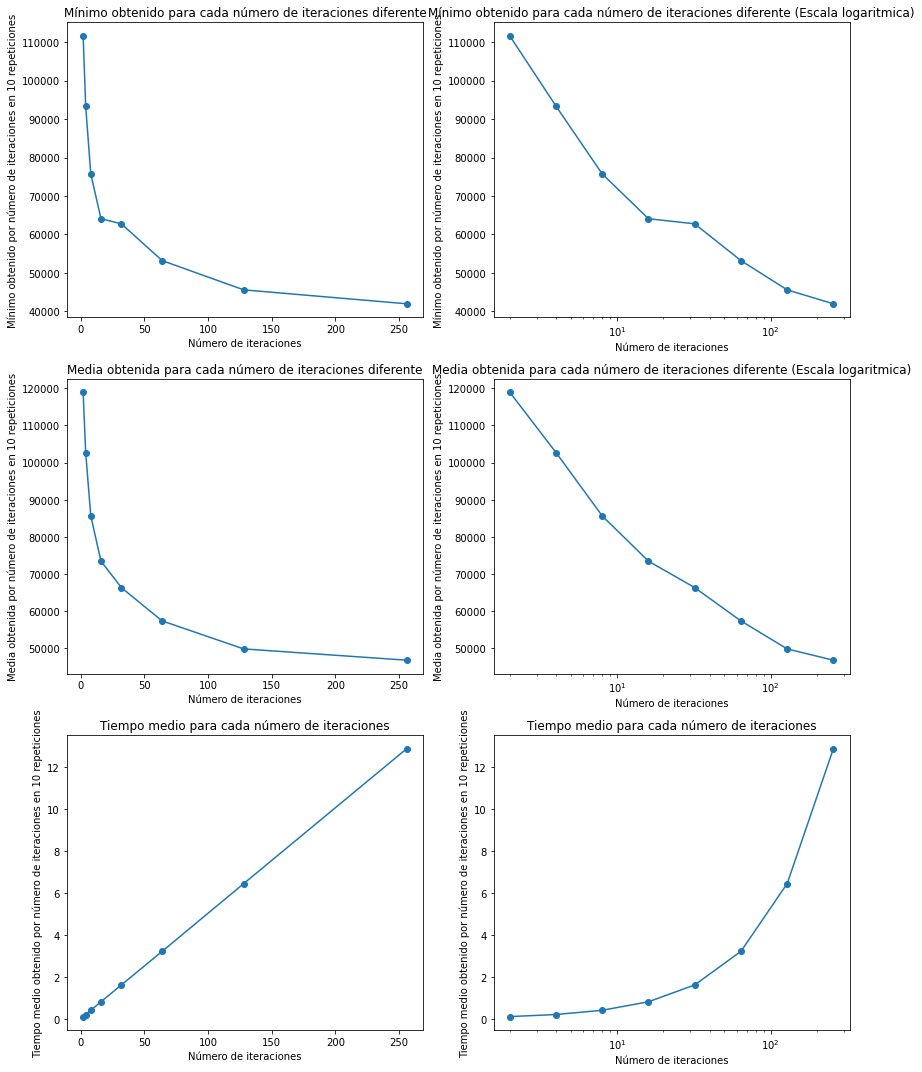

In [87]:
def graficas(REPETICIONES, valores, filename):

    with open(filename, 'rb') as archivo:
        soluciones = pickle.load(archivo)

    #print(soluciones)

    minimos = [min(fila, key=lambda x: x[1])[1] for fila in soluciones]
    medias = [sum(sol[1] for sol in solucion)/REPETICIONES for solucion in soluciones]
    tiempo_medio = [sum(sol[2] for sol in solucion)/REPETICIONES for solucion in soluciones]

    fig, axs = plt.subplots(3, 2, figsize=(12, 15))

    # Graficar los mínimos en el primer subgráfico
    axs[0][0].plot(valores, minimos, marker='o', linestyle='-')
    axs[0][0].set_xlabel('Número de iteraciones')
    axs[0][0].set_ylabel(f'Mínimo obtenido por número de iteraciones en {REPETICIONES} repeticiones')
    axs[0][0].set_title('Mínimo obtenido para cada número de iteraciones diferente')
    #axs[0].set_xscale('log') 

    axs[1][0].plot(valores, medias, marker='o', linestyle='-')
    axs[1][0].set_xlabel('Número de iteraciones')
    axs[1][0].set_ylabel(f'Media obtenida por número de iteraciones en {REPETICIONES} repeticiones')
    axs[1][0].set_title('Media obtenida para cada número de iteraciones diferente')
    #axs[1][0].set_xscale('log') 

    # Graficar los mínimos en el primer subgráfico
    axs[0][1].plot(valores, minimos, marker='o', linestyle='-')
    axs[0][1].set_xlabel('Número de iteraciones')
    axs[0][1].set_ylabel(f'Mínimo obtenido por número de iteraciones en {REPETICIONES} repeticiones')
    axs[0][1].set_title('Mínimo obtenido para cada número de iteraciones diferente (Escala logaritmica)')
    axs[0][1].set_xscale('log') 

    axs[1][1].plot(valores, medias, marker='o', linestyle='-')
    axs[1][1].set_xlabel('Número de iteraciones')
    axs[1][1].set_ylabel(f'Media obtenida por número de iteraciones en {REPETICIONES} repeticiones')
    axs[1][1].set_title('Media obtenida para cada número de iteraciones diferente (Escala logaritmica)')
    axs[1][1].set_xscale('log') 

    # Graficar los mínimos en el primer subgráfico
    axs[2][0].plot(valores, tiempo_medio, marker='o', linestyle='-')
    axs[2][0].set_xlabel('Número de iteraciones')
    axs[2][0].set_ylabel(f'Tiempo medio obtenido por número de iteraciones en {REPETICIONES} repeticiones')
    axs[2][0].set_title('Tiempo medio para cada número de iteraciones')
    #axs[0][2].set_xscale('log')

    # Graficar los mínimos en el primer subgráfico
    axs[2][1].plot(valores, tiempo_medio, marker='o', linestyle='-')
    axs[2][1].set_xlabel('Número de iteraciones')
    axs[2][1].set_ylabel(f'Tiempo medio obtenido por número de iteraciones en {REPETICIONES} repeticiones')
    axs[2][1].set_title('Tiempo medio para cada número de iteraciones')
    axs[2][1].set_xscale('log')

    plt.tight_layout()

    # Mostrar los gráficos
    plt.show()

graficas(10, [2,4,8,16,32,64,128,256], 'soluciones_totales_tam_pob_mitades.pkl')

In [17]:
#FUNCION PARA RECIBIR UNA TABLA EN MARKDOWN CON LOS ÍNDICES DE MEJORA
from IPython.display import Markdown, display
import numpy as np

def imprimir_tabla_markdown_jupyter(lista_anidada):
    markdown_output = ""
    
    # Construir encabezados
    markdown_output += "| " + " | ".join(map(str, lista_anidada[0])) + " |\n"

    # Construir separador
    markdown_output += "| " + " | ".join(['---'] * len(lista_anidada[0])) + " |\n"

    # Construir filas de datos
    for row in lista_anidada[1:]:
        markdown_output += "| **" + str(row[0]) + "** | " + " | ".join(map(str, row[1:])) + " |\n"

    # Imprimir como Markdown
    display(Markdown(markdown_output))
    
def tabla_mejora(primera_columna, primera_fila, REPETICIONES, filename):
    with open(filename, 'rb') as archivo:
        soluciones = pickle.load(archivo)
        
    matriz = []
    matriz.append(primera_columna)
        
    medias = [sum(sol[1] for sol in solucion)/REPETICIONES for solucion in soluciones]
    tiempo_medio = [sum(sol[2] for sol in solucion)/REPETICIONES for solucion in soluciones]
    
    mejora_media_anterior = [1.0] + [medias[i-1]/medias[i] for i in range(1,len(medias))]
    mejora_media_primero = [medias[0]/medias[i] for i in range(len(medias))]
        
    matriz.append(medias)
    matriz.append(mejora_media_anterior)
    matriz.append(mejora_media_primero)
    matriz.append(tiempo_medio)
    
    matriz_np = np.array(matriz)
    matriz_np = matriz_np.T
    matriz_np = np.round(matriz_np, decimals=3)
    matriz = matriz_np.tolist()
    
    matriz.insert(0, primera_fila)
    
    imprimir_tabla_markdown_jupyter(matriz)
    
tabla_mejora([2,4,8,16,32,64,128,256], ["Tamaño", "Media", "Mejora sobre anterior", "Mejora sobre primero", "Tiempo medio"], 10, 'soluciones_totales_tam_pob_mitades.pkl')

| Tamaño | Media | Mejora sobre anterior | Mejora sobre primero | Tiempo medio |
| --- | --- | --- | --- | --- |
| **2.0** | 118918.151 | 1.0 | 1.0 | 0.109 |
| **4.0** | 102699.959 | 1.158 | 1.158 | 0.208 |
| **8.0** | 85662.118 | 1.199 | 1.388 | 0.41 |
| **16.0** | 73488.282 | 1.166 | 1.618 | 0.815 |
| **32.0** | 66371.367 | 1.107 | 1.792 | 1.619 |
| **64.0** | 57418.113 | 1.156 | 2.071 | 3.218 |
| **128.0** | 49886.912 | 1.151 | 2.384 | 6.448 |
| **256.0** | 46852.139 | 1.065 | 2.538 | 12.884 |


In [ ]:
#PREGUNTA 2: probaremos ahora con tamaño 64, y cambiando el elitismo. EN la siguiente ya probaremos elitimso con el mejor valor.
elitismo = [1,2,4,6,8,16,20,25,40,50]
REPETICIONES = 10

soluciones_totales = []

for i in trange(len(elitismo)):
    soluciones_parciales = []
    for j in trange(REPETICIONES):
        inicio = time.time()
        soluciones_parciales.append([busqueda_genetica(500, 64, g2, 0.25, 0.95, MITAD=False, elite=elitismo[i], TODOS=False, DEBUG=False), 0, 0])
        fin = time.time()
        soluciones_parciales[j][1] = funcion_coste(soluciones_parciales[j][0], g2)
        soluciones_parciales[j][2] = fin-inicio
        #print(soluciones_parciales[j][1])
    soluciones_totales.append(soluciones_parciales)
    #print(soluciones_totales)
        
with open('soluciones_totales_elitismo.pkl', 'wb') as archivo:
    pickle.dump(soluciones_totales, archivo)

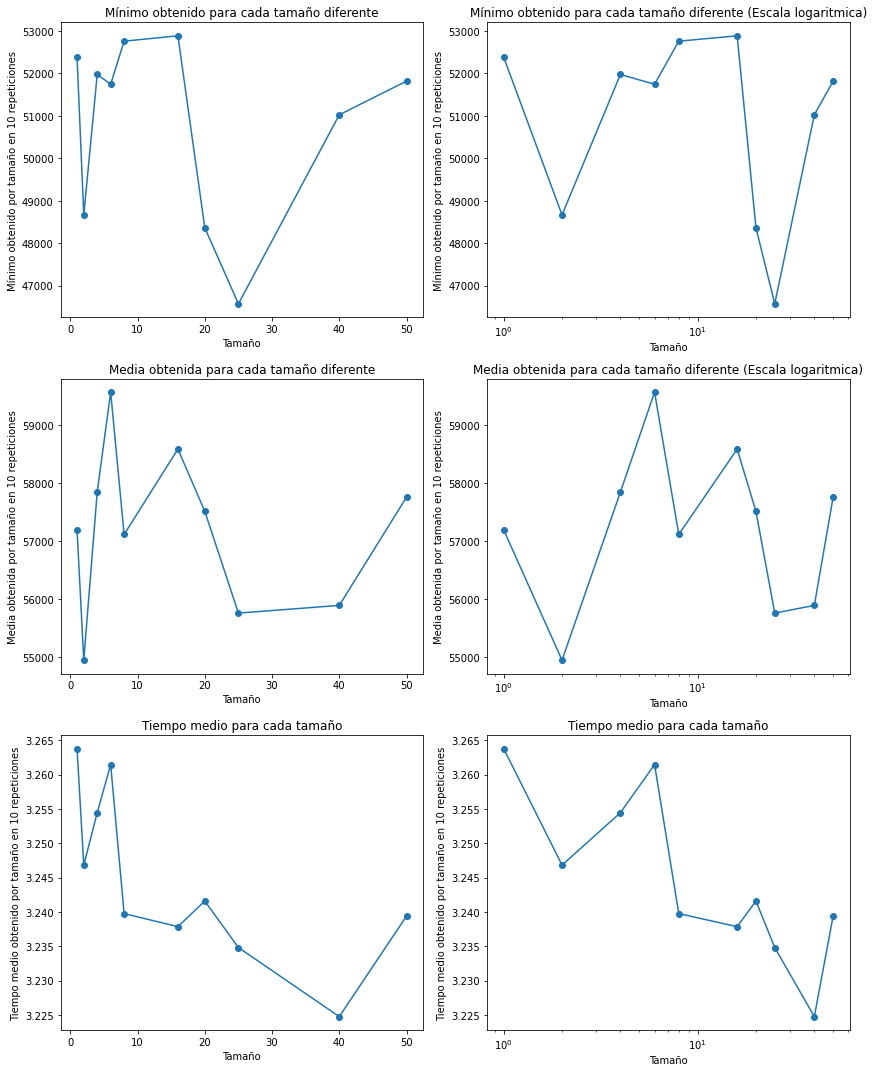

In [19]:
graficas(10, [1,2,4,6,8,16,20,25,40,50], 'soluciones_totales_elitismo.pkl')

In [ ]:
#PREGUNTA 2: Ahora probaremos elitismo=2,8,16 variando el tamaño.
tams = [2,4,8,16,32,64,128,256]
REPETICIONES = 10

soluciones_totales = []

for i in trange(len(tams)):
    soluciones_parciales = []
    for j in trange(REPETICIONES):
        inicio = time.time()
        soluciones_parciales.append([busqueda_genetica(500, tams[i], g2, 0.25, 0.95, MITAD=False, elite=2, TODOS=False, DEBUG=False), 0, 0])
        fin = time.time()
        soluciones_parciales[j][1] = funcion_coste(soluciones_parciales[j][0], g2)
        soluciones_parciales[j][2] = fin-inicio
        #print(soluciones_parciales[j][1])
    soluciones_totales.append(soluciones_parciales)
    #print(soluciones_totales)
        
with open('soluciones_totales_tam_pob_elitismo_2.pkl', 'wb') as archivo:
    pickle.dump(soluciones_totales, archivo)
    
    soluciones_totales = []

for i in trange(len(tams)):
    soluciones_parciales = []
    for j in trange(REPETICIONES):
        inicio = time.time()
        soluciones_parciales.append([busqueda_genetica(500, tams[i], g2, 0.25, 0.95, MITAD=False, elite=8, TODOS=False, DEBUG=False), 0, 0])
        fin = time.time()
        soluciones_parciales[j][1] = funcion_coste(soluciones_parciales[j][0], g2)
        soluciones_parciales[j][2] = fin-inicio
        #print(soluciones_parciales[j][1])
    soluciones_totales.append(soluciones_parciales)
    #print(soluciones_totales)
        
with open('soluciones_totales_tam_pob_elitismo_8.pkl', 'wb') as archivo:
    pickle.dump(soluciones_totales, archivo)
    
    soluciones_totales = []

for i in trange(len(tams)):
    soluciones_parciales = []
    for j in trange(REPETICIONES):
        inicio = time.time()
        soluciones_parciales.append([busqueda_genetica(500, tams[i], g2, 0.25, 0.95, MITAD=False, elite=16, TODOS=False, DEBUG=False), 0, 0])
        fin = time.time()
        soluciones_parciales[j][1] = funcion_coste(soluciones_parciales[j][0], g2)
        soluciones_parciales[j][2] = fin-inicio
        #print(soluciones_parciales[j][1])
    soluciones_totales.append(soluciones_parciales)
    #print(soluciones_totales)
        
with open('soluciones_totales_tam_pob_elitismo_16.pkl', 'wb') as archivo:
    pickle.dump(soluciones_totales, archivo)

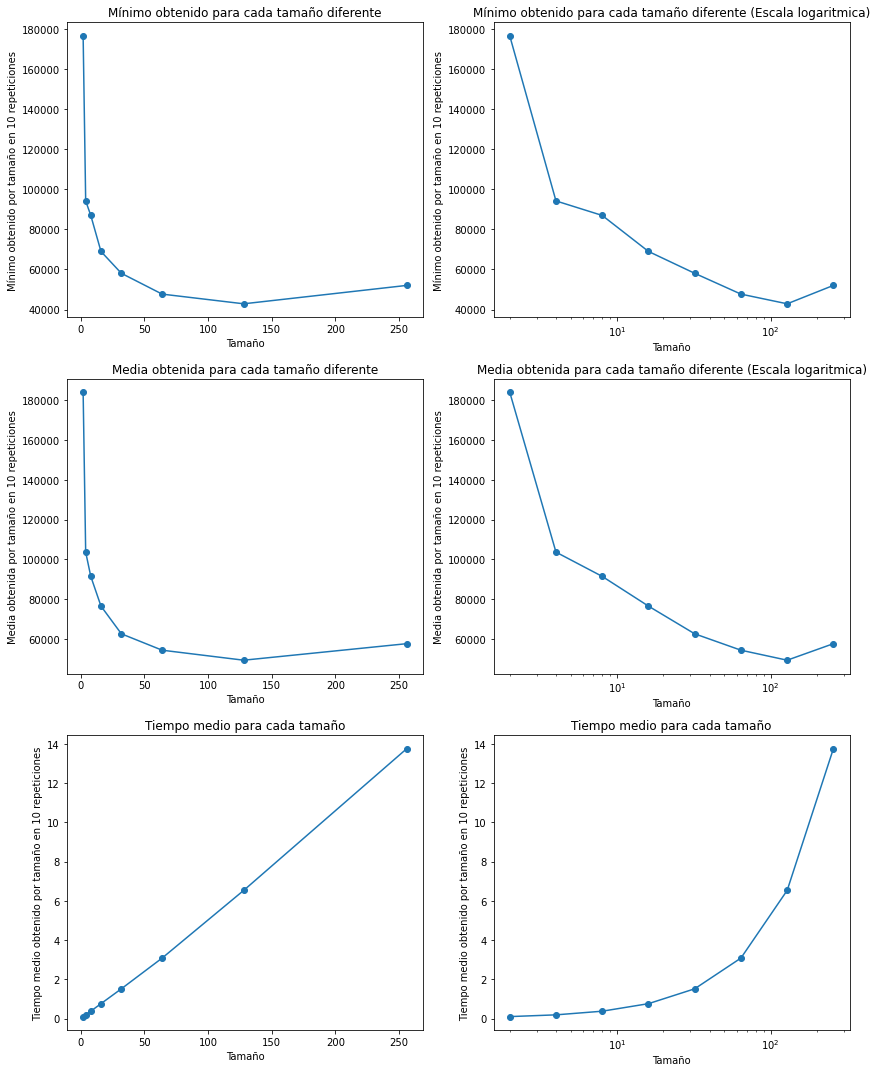

In [63]:
graficas(10, [2,4,8,16,32,64,128,256], 'soluciones_totales_tam_pob_elitismo_2.pkl')

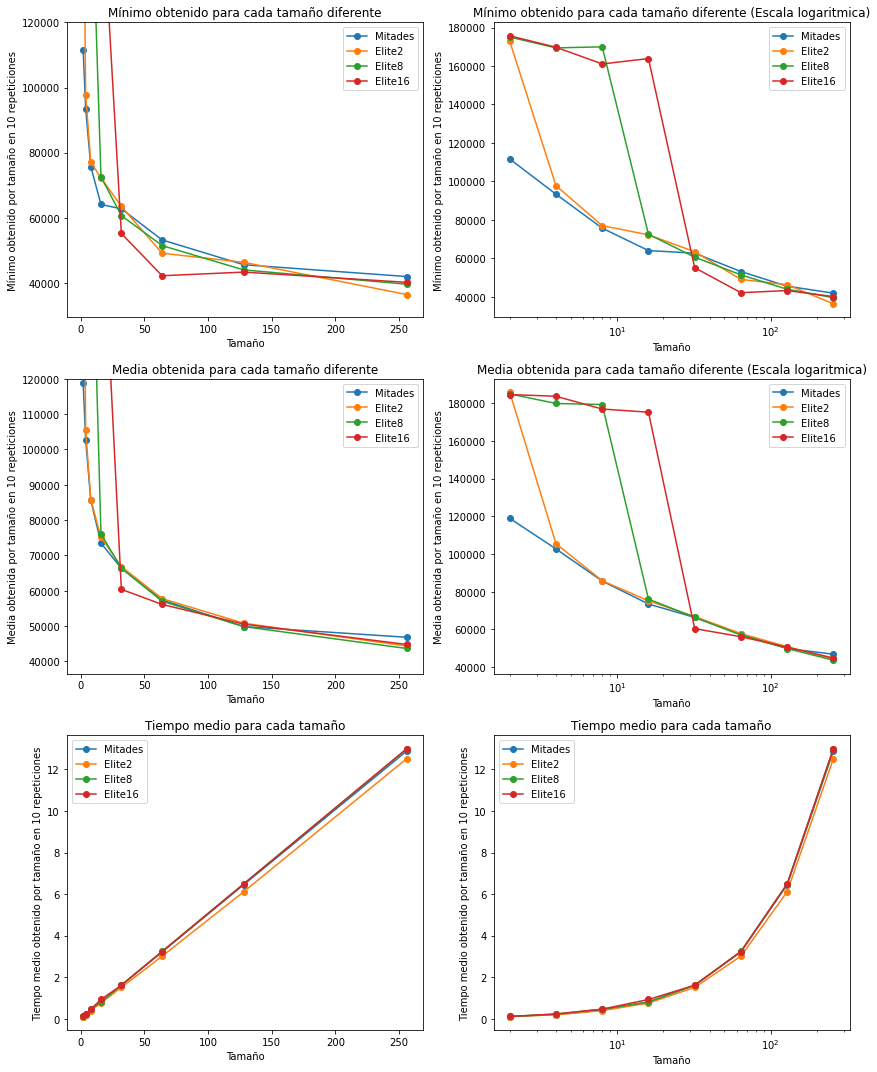

In [24]:
#AHORA HACEMOS LA COMPARATIVA ENTRE MITADES Y NO ELITISMO

    
REPETICIONES=10
valores = [2,4,8,16,32,64,128,256]



with open('soluciones_totales_tam_pob_mitades.pkl', 'rb') as archivo:
    soluciones_mitades = pickle.load(archivo)
    
with open('soluciones_totales_tam_pob_elitismo_2.pkl', 'rb') as archivo:
    soluciones_elite_2 = pickle.load(archivo)
    
with open('soluciones_totales_tam_pob_elitismo_8.pkl', 'rb') as archivo:
    soluciones_elite_8 = pickle.load(archivo)

with open('soluciones_totales_tam_pob_elitismo_16.pkl', 'rb') as archivo:
    soluciones_elite_16 = pickle.load(archivo)
    

#print(soluciones)

minimos_mitades = [min(fila, key=lambda x: x[1])[1] for fila in soluciones_mitades]
medias_mitades = [sum(sol[1] for sol in solucion)/REPETICIONES for solucion in soluciones_mitades]
tiempo_medio_mitades = [sum(sol[2] for sol in solucion)/REPETICIONES for solucion in soluciones_mitades]

minimos_elite_2 = [min(fila, key=lambda x: x[1])[1] for fila in soluciones_elite_2]
medias_elite_2 = [sum(sol[1] for sol in solucion)/REPETICIONES for solucion in soluciones_elite_2]
tiempo_medio_elite_2 = [sum(sol[2] for sol in solucion)/REPETICIONES for solucion in soluciones_elite_2]

minimos_elite_8 = [min(fila, key=lambda x: x[1])[1] for fila in soluciones_elite_8]
medias_elite_8 = [sum(sol[1] for sol in solucion)/REPETICIONES for solucion in soluciones_elite_8]
tiempo_medio_elite_8 = [sum(sol[2] for sol in solucion)/REPETICIONES for solucion in soluciones_elite_8]

minimos_elite_16 = [min(fila, key=lambda x: x[1])[1] for fila in soluciones_elite_16]
medias_elite_16 = [sum(sol[1] for sol in solucion)/REPETICIONES for solucion in soluciones_elite_16]
tiempo_medio_elite_16 = [sum(sol[2] for sol in solucion)/REPETICIONES for solucion in soluciones_elite_16]

fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# Graficar los mínimos en el primer subgráfico
axs[0][0].plot(valores, minimos_mitades, marker='o', linestyle='-', label="Mitades")
axs[0][0].plot(valores, minimos_elite_2, marker='o', linestyle='-', label="Elite2")
axs[0][0].plot(valores, minimos_elite_8, marker='o', linestyle='-', label="Elite8")
axs[0][0].plot(valores, minimos_elite_16, marker='o', linestyle='-', label="Elite16")
axs[0][0].set_xlabel('Tamaño')
axs[0][0].set_ylabel(f'Mínimo obtenido por tamaño en {REPETICIONES} repeticiones')
axs[0][0].set_title('Mínimo obtenido para cada tamaño diferente')
axs[0][0].legend()
axs[0][0].set_ylim(top=120000)
#axs[0].set_xscale('log') 

axs[1][0].plot(valores, medias_mitades, marker='o', linestyle='-', label="Mitades")
axs[1][0].plot(valores, medias_elite_2, marker='o', linestyle='-', label="Elite2")
axs[1][0].plot(valores, medias_elite_8, marker='o', linestyle='-', label="Elite8")
axs[1][0].plot(valores, medias_elite_16, marker='o', linestyle='-', label="Elite16")
axs[1][0].set_xlabel('Tamaño')
axs[1][0].set_ylabel(f'Media obtenida por tamaño en {REPETICIONES} repeticiones')
axs[1][0].set_title('Media obtenida para cada tamaño diferente')
axs[1][0].set_ylim(top=120000)
axs[1][0].legend()
#axs[1][0].set_xscale('log') 

# Graficar los mínimos en el primer subgráfico
axs[0][1].plot(valores, minimos_mitades, marker='o', linestyle='-', label="Mitades")
axs[0][1].plot(valores, minimos_elite_2, marker='o', linestyle='-', label="Elite2")
axs[0][1].plot(valores, minimos_elite_8, marker='o', linestyle='-', label="Elite8")
axs[0][1].plot(valores, minimos_elite_16, marker='o', linestyle='-', label="Elite16")
axs[0][1].set_xlabel('Tamaño')
axs[0][1].set_ylabel(f'Mínimo obtenido por tamaño en {REPETICIONES} repeticiones')
axs[0][1].set_title('Mínimo obtenido para cada tamaño diferente (Escala logaritmica)')
axs[0][1].set_xscale('log') 
#axs[0][1].set_ylim(top=120000)
axs[0][1].legend()

axs[1][1].plot(valores, medias_mitades, marker='o', linestyle='-', label="Mitades")
axs[1][1].plot(valores, medias_elite_2, marker='o', linestyle='-', label="Elite2")
axs[1][1].plot(valores, medias_elite_8, marker='o', linestyle='-', label="Elite8")
axs[1][1].plot(valores, medias_elite_16, marker='o', linestyle='-', label="Elite16")
axs[1][1].set_xlabel('Tamaño')
axs[1][1].set_ylabel(f'Media obtenida por tamaño en {REPETICIONES} repeticiones')
axs[1][1].set_title('Media obtenida para cada tamaño diferente (Escala logaritmica)')
axs[1][1].set_xscale('log') 
#axs[1][1].set_ylim(top=120000)
axs[1][1].legend()

# Graficar los mínimos en el primer subgráfico
axs[2][0].plot(valores, tiempo_medio_mitades, marker='o', linestyle='-', label="Mitades")
axs[2][0].plot(valores, tiempo_medio_elite_2, marker='o', linestyle='-', label="Elite2")
axs[2][0].plot(valores, tiempo_medio_elite_8, marker='o', linestyle='-', label="Elite8")
axs[2][0].plot(valores, tiempo_medio_elite_16, marker='o', linestyle='-', label="Elite16")
axs[2][0].set_xlabel('Tamaño')
axs[2][0].set_ylabel(f'Tiempo medio obtenido por tamaño en {REPETICIONES} repeticiones')
axs[2][0].set_title('Tiempo medio para cada tamaño')
#axs[0][2].set_xscale('log')
axs[2][0].legend()

# Graficar los mínimos en el primer subgráfico
axs[2][1].plot(valores, tiempo_medio_mitades, marker='o', linestyle='-', label="Mitades")
axs[2][1].plot(valores, tiempo_medio_elite_2, marker='o', linestyle='-', label="Elite2")
axs[2][1].plot(valores, tiempo_medio_elite_8, marker='o', linestyle='-', label="Elite8")
axs[2][1].plot(valores, tiempo_medio_elite_16, marker='o', linestyle='-', label="Elite16")
axs[2][1].set_xlabel('Tamaño')
axs[2][1].set_ylabel(f'Tiempo medio obtenido por tamaño en {REPETICIONES} repeticiones')
axs[2][1].set_title('Tiempo medio para cada tamaño')
axs[2][1].set_xscale('log')
axs[2][1].legend()

plt.tight_layout()

# Mostrar los gráficos
plt.show()



<h1> PREGUNTA 3 </h1>

❓ Pregunta 3. Ahora realiza un estudio similar variando la probabilidad de mutación en el rango 0, ..., 0.95 en pasos de 0.05~0.10. ¿Qué valor recomendarías para este parámetro? ¿Por qué? Ten en cuenta que tienes dos variantes del mecanismo de mutación.

In [267]:
#PREGUNTA 3:Probaremos con un tamaño de población fijo de 64, y con diferentes probabilidades de mutación. Primero con mutacion individual
PASO = 0.05
PMs = [i * PASO for i in range(int(1 / PASO) + 1)]
REPETICIONES = 10

soluciones_totales = []

for i in trange(len(PMs)):
    soluciones_parciales = []
    for j in trange(REPETICIONES):
        inicio = time.time()
        soluciones_parciales.append([busqueda_genetica(500, 64, g2, PMs[i], 0.95, MITAD=True, TODOS=False, DEBUG=False), 0, 0])
        fin = time.time()
        soluciones_parciales[j][1] = funcion_coste(soluciones_parciales[j][0], g2)
        soluciones_parciales[j][2] = fin-inicio
        #print(soluciones_parciales[j][1])
    soluciones_totales.append(soluciones_parciales)
    #print(soluciones_totales)
        
with open('soluciones_totales_mutacion_individual.pkl', 'wb') as archivo:
    pickle.dump(soluciones_totales, archivo)

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

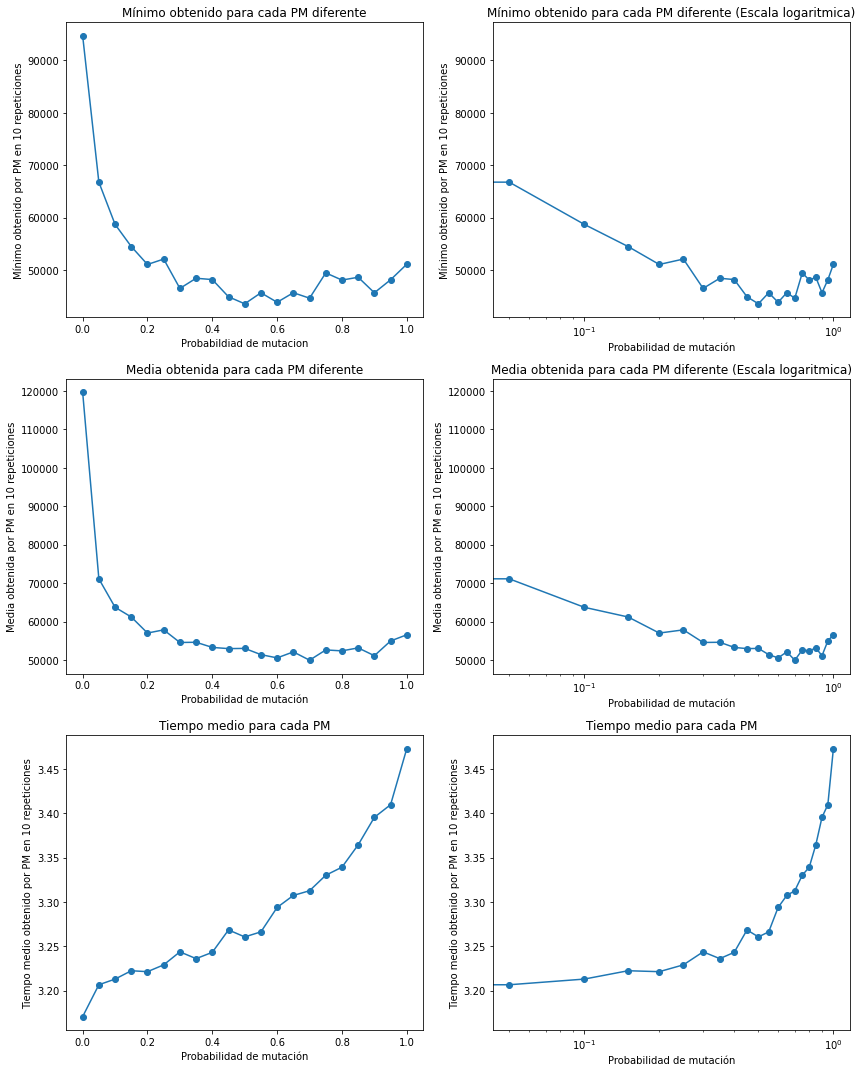

In [69]:
graficas(10, [i * 0.05 for i in range(int(1 / 0.05) + 1)], 'soluciones_totales_mutacion_individual.pkl')

In [269]:
#PREGUNTA 3:Probaremos con un tamaño de población fijo de 64, y con diferentes probabilidades de mutación. Ahora con mutacion colectiva
PASO = 0.05
PMs = [i * PASO for i in range(int(1 / PASO) + 1)]
REPETICIONES = 10

soluciones_totales = []

for i in trange(len(PMs)):
    soluciones_parciales = []
    for j in trange(REPETICIONES):
        inicio = time.time()
        soluciones_parciales.append([busqueda_genetica(500, 64, g2, PMs[i], 0.95, MITAD=True, TODOS=True, DEBUG=False), 0, 0])
        fin = time.time()
        soluciones_parciales[j][1] = funcion_coste(soluciones_parciales[j][0], g2)
        soluciones_parciales[j][2] = fin-inicio
        #print(soluciones_parciales[j][1])
    soluciones_totales.append(soluciones_parciales)
    #print(soluciones_totales)
        
with open('soluciones_totales_mutacion_colectiva.pkl', 'wb') as archivo:
    pickle.dump(soluciones_totales, archivo)

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

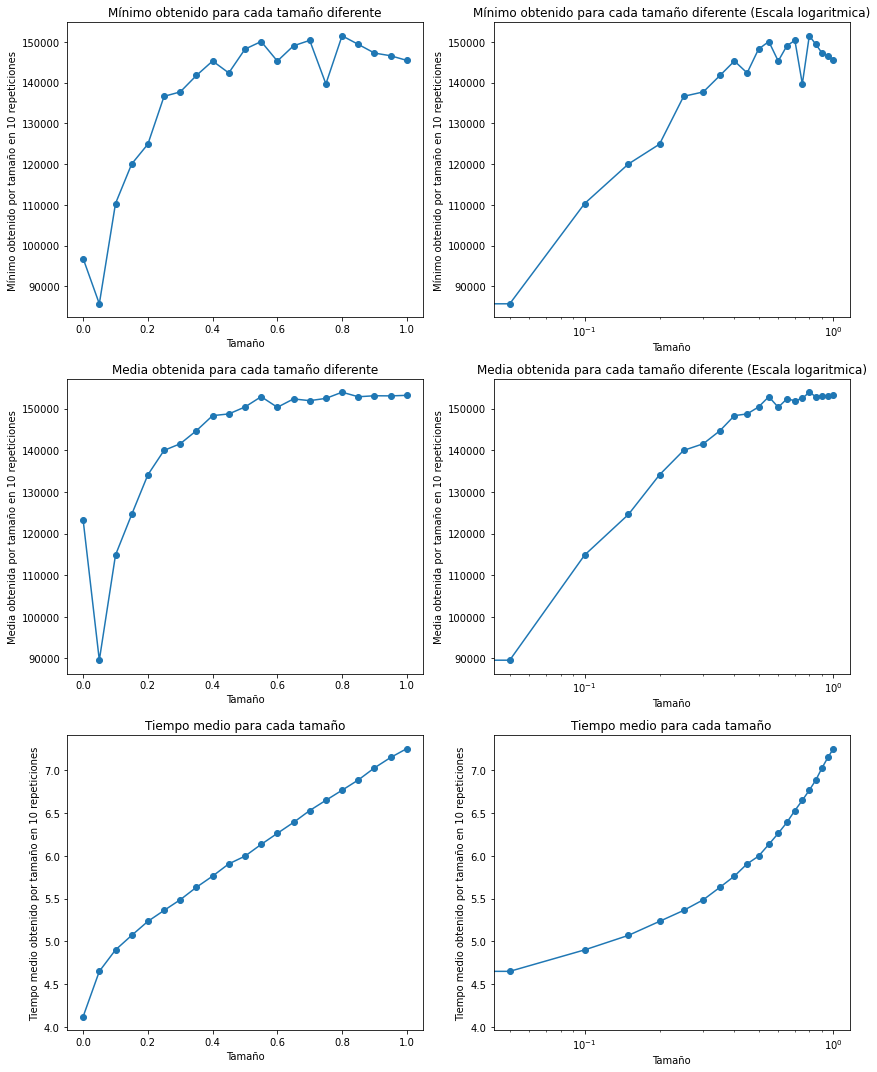

In [270]:
graficas(10, [i * 0.05 for i in range(int(1 / 0.05) + 1)], 'soluciones_totales_mutacion_colectiva.pkl')

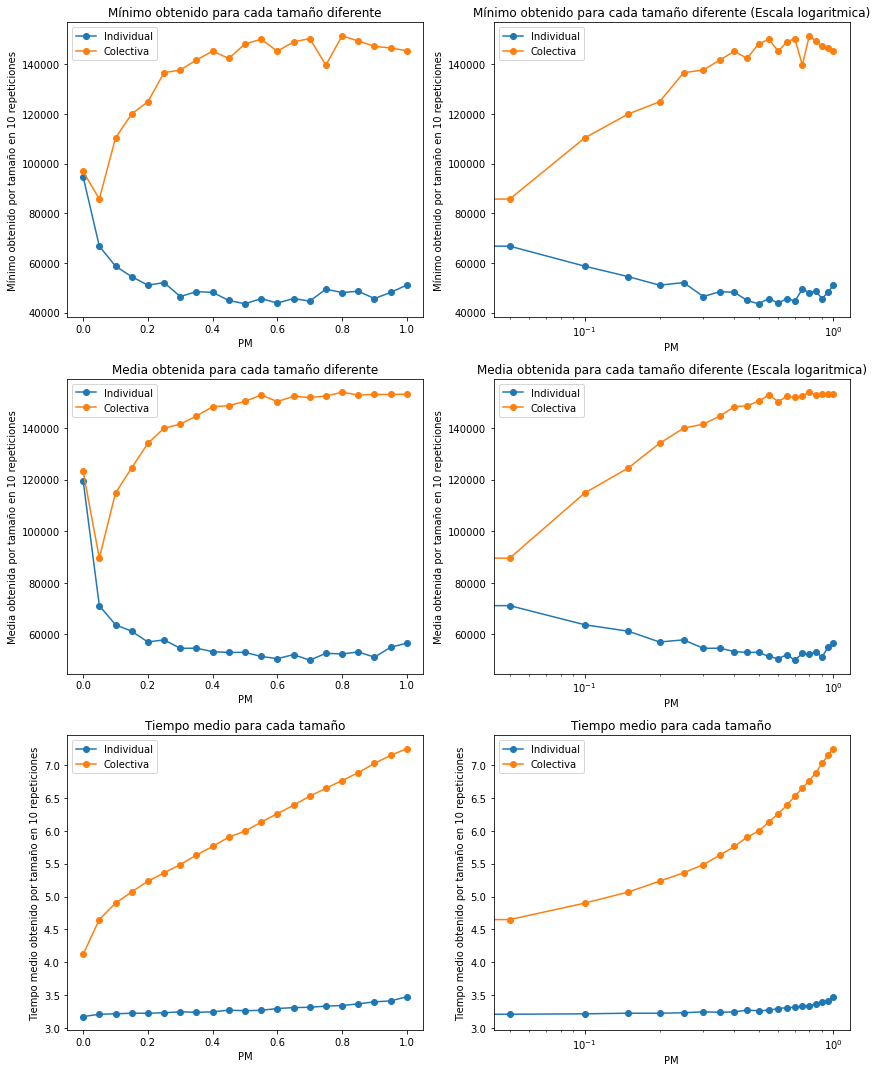

In [271]:
#AHORA HACEMOS LA COMPARATIVA ENTRE MITADES Y NO ELITISMO

    
REPETICIONES=10
valores = [i * 0.05 for i in range(int(1 / 0.05) + 1)]



with open('soluciones_totales_mutacion_individual.pkl', 'rb') as archivo:
    soluciones_individual = pickle.load(archivo)
    
with open('soluciones_totales_mutacion_colectiva.pkl', 'rb') as archivo:
    soluciones_colectiva = pickle.load(archivo)
    

#print(soluciones)

minimos_individual = [min(fila, key=lambda x: x[1])[1] for fila in soluciones_individual]
medias_individual = [sum(sol[1] for sol in solucion)/REPETICIONES for solucion in soluciones_individual]
tiempo_medio_individual = [sum(sol[2] for sol in solucion)/REPETICIONES for solucion in soluciones_individual]

minimos_colectiva = [min(fila, key=lambda x: x[1])[1] for fila in soluciones_colectiva]
medias_colectiva = [sum(sol[1] for sol in solucion)/REPETICIONES for solucion in soluciones_colectiva]
tiempo_medio_colectiva= [sum(sol[2] for sol in solucion)/REPETICIONES for solucion in soluciones_colectiva]

fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# Graficar los mínimos en el primer subgráfico
axs[0][0].plot(valores, minimos_individual, marker='o', linestyle='-', label="Individual")
axs[0][0].plot(valores, minimos_colectiva, marker='o', linestyle='-', label="Colectiva")
axs[0][0].set_xlabel('PM')
axs[0][0].set_ylabel(f'Mínimo obtenido por tamaño en {REPETICIONES} repeticiones')
axs[0][0].set_title('Mínimo obtenido para cada tamaño diferente')
axs[0][0].legend()
#axs[0].set_xscale('log') 

axs[1][0].plot(valores, medias_individual, marker='o', linestyle='-', label="Individual")
axs[1][0].plot(valores, medias_colectiva, marker='o', linestyle='-', label="Colectiva")
axs[1][0].set_xlabel('PM')
axs[1][0].set_ylabel(f'Media obtenida por tamaño en {REPETICIONES} repeticiones')
axs[1][0].set_title('Media obtenida para cada tamaño diferente')
axs[1][0].legend()
#axs[1][0].set_xscale('log') 

# Graficar los mínimos en el primer subgráfico
axs[0][1].plot(valores, minimos_individual, marker='o', linestyle='-', label="Individual")
axs[0][1].plot(valores, minimos_colectiva, marker='o', linestyle='-', label="Colectiva")
axs[0][1].set_xlabel('PM')
axs[0][1].set_ylabel(f'Mínimo obtenido por tamaño en {REPETICIONES} repeticiones')
axs[0][1].set_title('Mínimo obtenido para cada tamaño diferente (Escala logaritmica)')
axs[0][1].set_xscale('log') 
#axs[0][1].set_ylim(top=120000)
axs[0][1].legend()

axs[1][1].plot(valores, medias_individual, marker='o', linestyle='-', label="Individual")
axs[1][1].plot(valores, medias_colectiva, marker='o', linestyle='-', label="Colectiva")
axs[1][1].set_xlabel('PM')
axs[1][1].set_ylabel(f'Media obtenida por tamaño en {REPETICIONES} repeticiones')
axs[1][1].set_title('Media obtenida para cada tamaño diferente (Escala logaritmica)')
axs[1][1].set_xscale('log') 
#axs[1][1].set_ylim(top=120000)
axs[1][1].legend()

# Graficar los mínimos en el primer subgráfico
axs[2][0].plot(valores, tiempo_medio_individual, marker='o', linestyle='-', label="Individual")
axs[2][0].plot(valores, tiempo_medio_colectiva, marker='o', linestyle='-', label="Colectiva")
axs[2][0].set_xlabel('PM')
axs[2][0].set_ylabel(f'Tiempo medio obtenido por tamaño en {REPETICIONES} repeticiones')
axs[2][0].set_title('Tiempo medio para cada tamaño')
#axs[0][2].set_xscale('log')
axs[2][0].legend()

# Graficar los mínimos en el primer subgráfico
axs[2][1].plot(valores, tiempo_medio_individual, marker='o', linestyle='-', label="Individual")
axs[2][1].plot(valores, tiempo_medio_colectiva, marker='o', linestyle='-', label="Colectiva")
axs[2][1].set_xlabel('PM')
axs[2][1].set_ylabel(f'Tiempo medio obtenido por tamaño en {REPETICIONES} repeticiones')
axs[2][1].set_title('Tiempo medio para cada tamaño')
axs[2][1].set_xscale('log')
axs[2][1].legend()

plt.tight_layout()

# Mostrar los gráficos
plt.show()



In [272]:
#PREGUNTA 3:Probaremos con un tamaño de población fijo de 64, y con diferentes probabilidades de mutación. Ahora con mutacion colectiva
PMs = lista_numeros = np.linspace(0,0.015,num=21).tolist()
REPETICIONES = 10

soluciones_totales = []

for i in trange(len(PMs)):
    soluciones_parciales = []
    for j in trange(REPETICIONES):
        inicio = time.time()
        soluciones_parciales.append([busqueda_genetica(500, 64, g2, PMs[i], 0.95, MITAD=True, TODOS=True, DEBUG=False), 0, 0])
        fin = time.time()
        soluciones_parciales[j][1] = funcion_coste(soluciones_parciales[j][0], g2)
        soluciones_parciales[j][2] = fin-inicio
        #print(soluciones_parciales[j][1])
    soluciones_totales.append(soluciones_parciales)
    #print(soluciones_totales)
        
with open('soluciones_totales_mutacion_colectiva_0.015.pkl', 'wb') as archivo:
    pickle.dump(soluciones_totales, archivo)

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

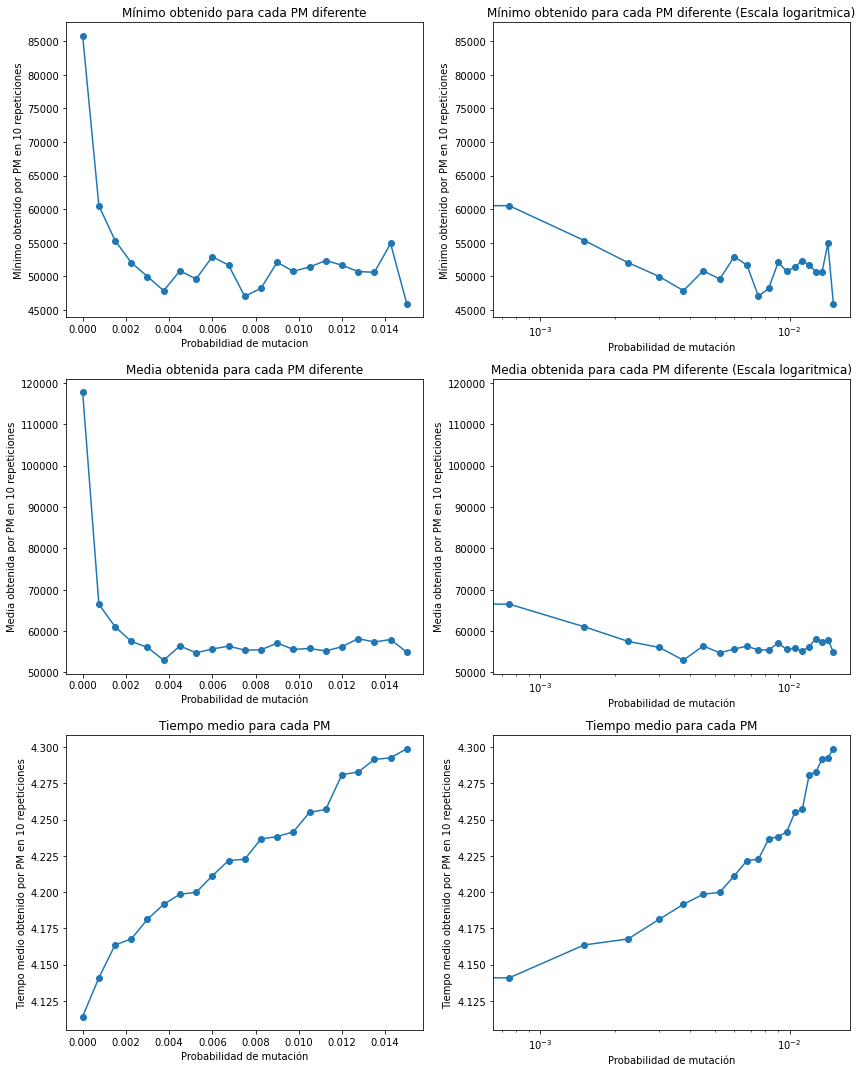

In [85]:
graficas(10, np.linspace(0,0.015,num=21).tolist(), 'soluciones_totales_mutacion_colectiva_0.015.pkl')

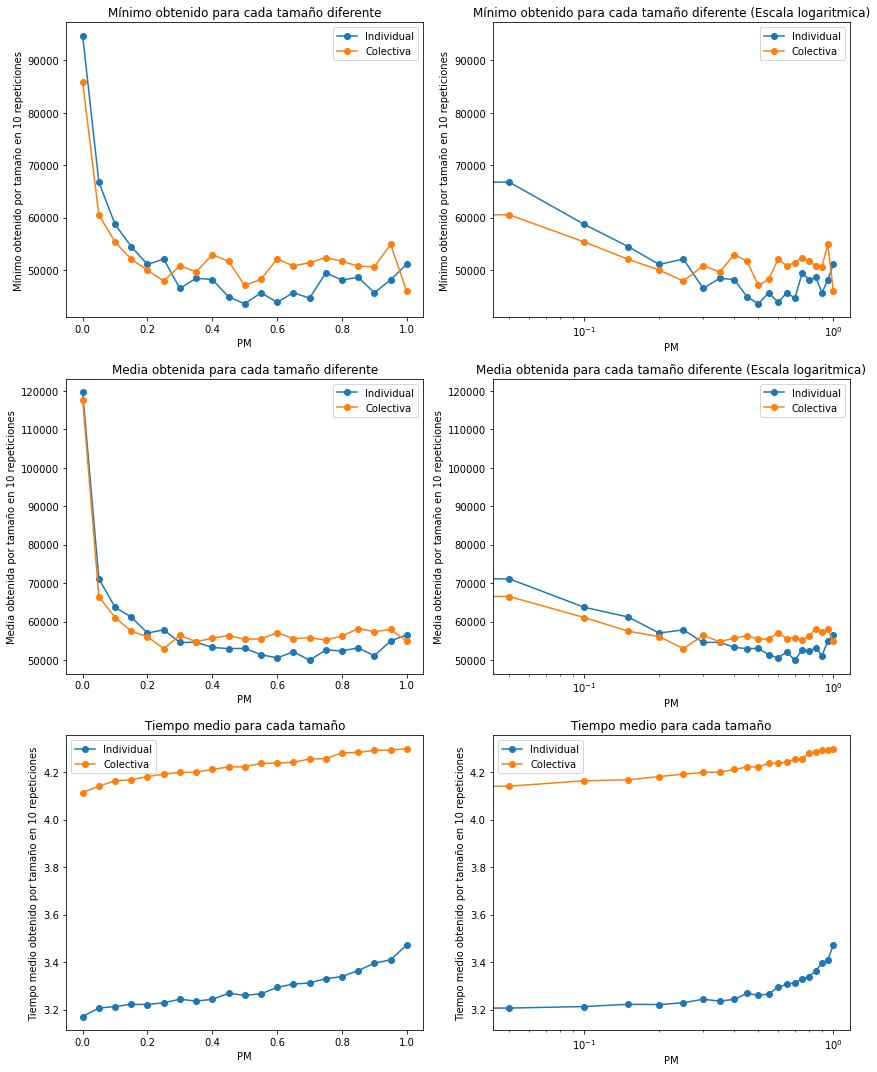

In [67]:
#AHORA HACEMOS LA COMPARATIVA ENTRE MITADES Y NO ELITISMO

    
REPETICIONES=10
valores = [i * 0.05 for i in range(int(1 / 0.05) + 1)]



with open('soluciones_totales_mutacion_individual.pkl', 'rb') as archivo:
    soluciones_individual = pickle.load(archivo)
    
with open('soluciones_totales_mutacion_colectiva_0.015.pkl', 'rb') as archivo:
    soluciones_colectiva = pickle.load(archivo)
    

#print(soluciones)

minimos_individual = [min(fila, key=lambda x: x[1])[1] for fila in soluciones_individual]
medias_individual = [sum(sol[1] for sol in solucion)/REPETICIONES for solucion in soluciones_individual]
tiempo_medio_individual = [sum(sol[2] for sol in solucion)/REPETICIONES for solucion in soluciones_individual]

minimos_colectiva = [min(fila, key=lambda x: x[1])[1] for fila in soluciones_colectiva]
medias_colectiva = [sum(sol[1] for sol in solucion)/REPETICIONES for solucion in soluciones_colectiva]
tiempo_medio_colectiva= [sum(sol[2] for sol in solucion)/REPETICIONES for solucion in soluciones_colectiva]

fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# Graficar los mínimos en el primer subgráfico
axs[0][0].plot(valores, minimos_individual, marker='o', linestyle='-', label="Individual")
axs[0][0].plot(valores, minimos_colectiva, marker='o', linestyle='-', label="Colectiva")
axs[0][0].set_xlabel('PM')
axs[0][0].set_ylabel(f'Mínimo obtenido por tamaño en {REPETICIONES} repeticiones')
axs[0][0].set_title('Mínimo obtenido para cada tamaño diferente')
axs[0][0].legend()
#axs[0].set_xscale('log') 

axs[1][0].plot(valores, medias_individual, marker='o', linestyle='-', label="Individual")
axs[1][0].plot(valores, medias_colectiva, marker='o', linestyle='-', label="Colectiva")
axs[1][0].set_xlabel('PM')
axs[1][0].set_ylabel(f'Media obtenida por tamaño en {REPETICIONES} repeticiones')
axs[1][0].set_title('Media obtenida para cada tamaño diferente')
axs[1][0].legend()
#axs[1][0].set_xscale('log') 

# Graficar los mínimos en el primer subgráfico
axs[0][1].plot(valores, minimos_individual, marker='o', linestyle='-', label="Individual")
axs[0][1].plot(valores, minimos_colectiva, marker='o', linestyle='-', label="Colectiva")
axs[0][1].set_xlabel('PM')
axs[0][1].set_ylabel(f'Mínimo obtenido por tamaño en {REPETICIONES} repeticiones')
axs[0][1].set_title('Mínimo obtenido para cada tamaño diferente (Escala logaritmica)')
axs[0][1].set_xscale('log') 
#axs[0][1].set_ylim(top=120000)
axs[0][1].legend()

axs[1][1].plot(valores, medias_individual, marker='o', linestyle='-', label="Individual")
axs[1][1].plot(valores, medias_colectiva, marker='o', linestyle='-', label="Colectiva")
axs[1][1].set_xlabel('PM')
axs[1][1].set_ylabel(f'Media obtenida por tamaño en {REPETICIONES} repeticiones')
axs[1][1].set_title('Media obtenida para cada tamaño diferente (Escala logaritmica)')
axs[1][1].set_xscale('log') 
#axs[1][1].set_ylim(top=120000)
axs[1][1].legend()

# Graficar los mínimos en el primer subgráfico
axs[2][0].plot(valores, tiempo_medio_individual, marker='o', linestyle='-', label="Individual")
axs[2][0].plot(valores, tiempo_medio_colectiva, marker='o', linestyle='-', label="Colectiva")
axs[2][0].set_xlabel('PM')
axs[2][0].set_ylabel(f'Tiempo medio obtenido por tamaño en {REPETICIONES} repeticiones')
axs[2][0].set_title('Tiempo medio para cada tamaño')
#axs[0][2].set_xscale('log')
axs[2][0].legend()

# Graficar los mínimos en el primer subgráfico
axs[2][1].plot(valores, tiempo_medio_individual, marker='o', linestyle='-', label="Individual")
axs[2][1].plot(valores, tiempo_medio_colectiva, marker='o', linestyle='-', label="Colectiva")
axs[2][1].set_xlabel('PM')
axs[2][1].set_ylabel(f'Tiempo medio obtenido por tamaño en {REPETICIONES} repeticiones')
axs[2][1].set_title('Tiempo medio para cada tamaño')
axs[2][1].set_xscale('log')
axs[2][1].legend()

plt.tight_layout()

# Mostrar los gráficos
plt.show()



<h1> PREGUNTA 4 </h1>

❓ Pregunta 4. Finalmente realiza un estudio variando el número de iteraciones máximas en el rango de 50 a 1000, considerando un paso variable o adaptativo a conveniencia. ¿Qué valor recomendarías para este parámetro? ¿Por qué? Realiza una discusión reflexionando sobre los resultados conjuntos de estos tres parámetros. 

In [92]:
#PREGUNTA 4:Probaremos para un tamaño fijo de 64 a cambiar el número de iteraciones. 
ITS = np.linspace(50.0,1000.0,num=6).tolist()
ITS = [int(x) for x in ITS]
REPETICIONES = 10

soluciones_totales = []

for i in trange(len(ITS)):
    soluciones_parciales = []
    for j in trange(REPETICIONES):
        inicio = time.time()
        soluciones_parciales.append([busqueda_genetica(ITS[i], 64, g2, 0.25, 0.95, MITAD=True, TODOS=False, DEBUG=False), 0, 0])
        fin = time.time()
        soluciones_parciales[j][1] = funcion_coste(soluciones_parciales[j][0], g2)
        soluciones_parciales[j][2] = fin-inicio
        #print(soluciones_parciales[j][1])
    soluciones_totales.append(soluciones_parciales)
    #print(soluciones_totales)
        
with open('soluciones_totales_iteraciones.pkl', 'wb') as archivo:
    pickle.dump(soluciones_totales, archivo)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

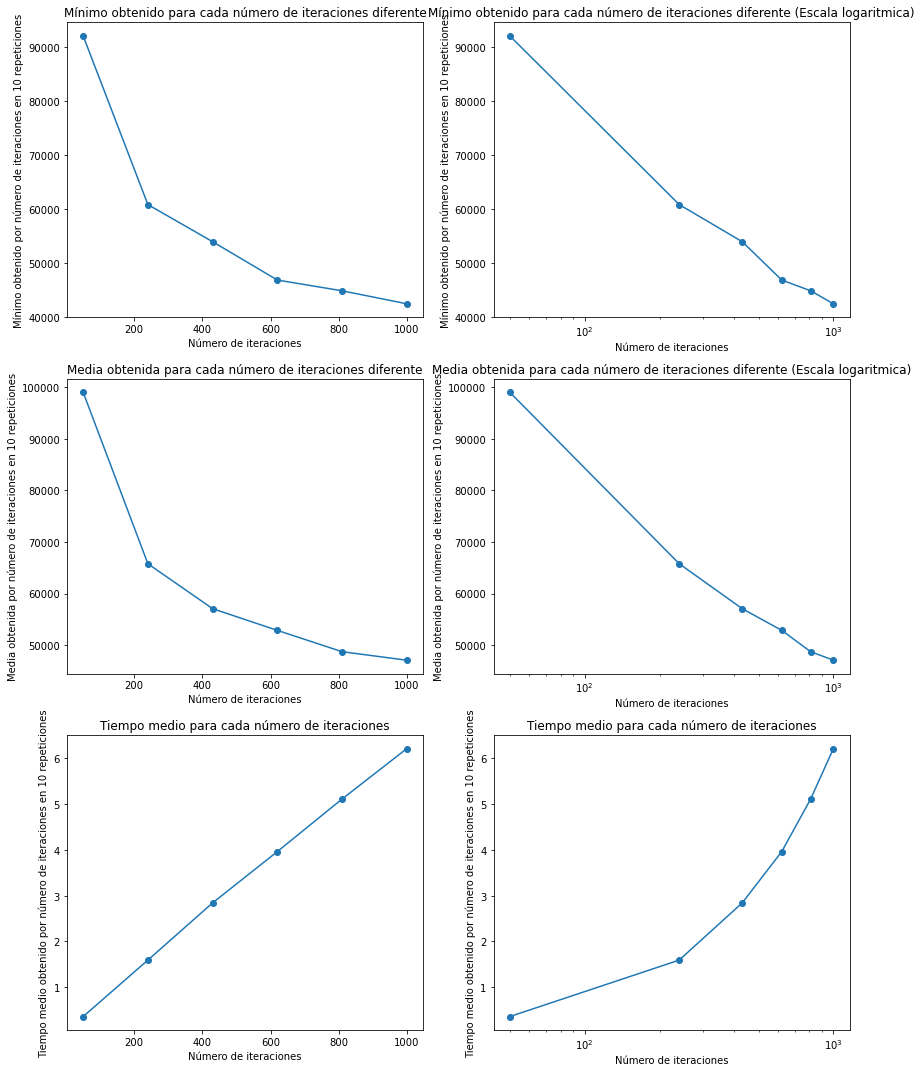

In [93]:
graficas(10, np.linspace(50.0,1000.0,num=6).tolist(), 'soluciones_totales_iteraciones.pkl')

In [94]:
tabla_mejora(np.linspace(50.0,1000.0,num=6).tolist(), ["Tamaño", "Media", "Mejora sobre anterior", "Mejora sobre primero", "Tiempo medio"], 10, 'soluciones_totales_iteraciones.pkl')

| Tamaño | Media | Mejora sobre anterior | Mejora sobre primero | Tiempo medio |
| --- | --- | --- | --- | --- |
| **50.0** | 99047.692 | 1.0 | 1.0 | 0.36 |
| **240.0** | 65789.583 | 1.506 | 1.506 | 1.594 |
| **430.0** | 57077.913 | 1.153 | 1.735 | 2.843 |
| **620.0** | 52871.436 | 1.08 | 1.873 | 3.964 |
| **810.0** | 48735.773 | 1.085 | 2.032 | 5.111 |
| **1000.0** | 47087.306 | 1.035 | 2.103 | 6.213 |


<h1> INFORME </h1>

En esta práctica se ha desarrollado un algoritmo genético para resolver el problema del viajante de comercio. Este algoritmo se basa en trabajar con operaciones de selección, cruce, mutación y reemplazo sobre una población de soluciones. Una vez obtenido el algoritmo funcional, verificado con un mapa de 8 ciudades, sabiendo que es capaz de obtener la solución óptima de 382km en un 25% de las veces, se pretende maximizar su rendimiento ajustando los parámetros principales que influyen en su funcionamiento

El primer parámetro a optimizar será el tamaño de la población, muy importante ya que el algoritmo se basa en la generación de descendencia a partir de esta. Probaremos tamaños con los valores 2,4,8,16,32,64,129 y 256. Obteniendo los siguientes resultados:

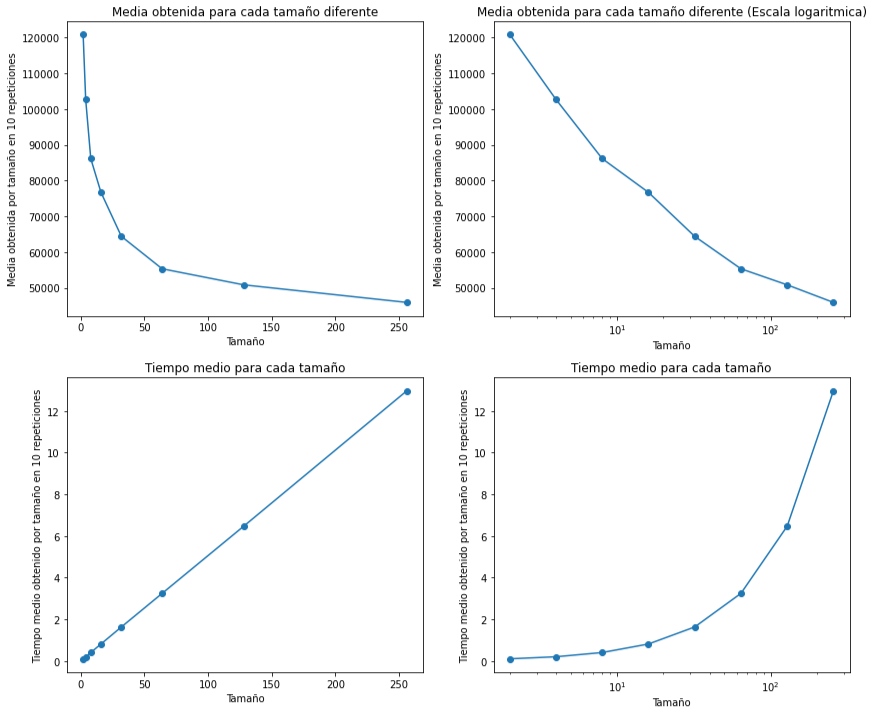

In [18]:
tabla_mejora([2,4,8,16,32,64,128,256], ["Tamaño", "Media", "Mejora sobre anterior", "Mejora sobre primero", "Tiempo medio"], 10, 'soluciones_totales_tam_pob_mitades.pkl')

| Tamaño | Media | Mejora sobre anterior | Mejora sobre primero | Tiempo medio |
| --- | --- | --- | --- | --- |
| **2.0** | 118918.151 | 1.0 | 1.0 | 0.109 |
| **4.0** | 102699.959 | 1.158 | 1.158 | 0.208 |
| **8.0** | 85662.118 | 1.199 | 1.388 | 0.41 |
| **16.0** | 73488.282 | 1.166 | 1.618 | 0.815 |
| **32.0** | 66371.367 | 1.107 | 1.792 | 1.619 |
| **64.0** | 57418.113 | 1.156 | 2.071 | 3.218 |
| **128.0** | 49886.912 | 1.151 | 2.384 | 6.448 |
| **256.0** | 46852.139 | 1.065 | 2.538 | 12.884 |


En un primer momento, lo que más llama la atención es que la forma de la gráfica de medias de costes obtenidas para cada tamaño tiene una forma exponencial decreciente. Esto significa que la proporción en que un tamaño mejora al anterior es siempre la misma (o similar). Esto se puede observar en los valores de la columna “Mejora sobre anterior” de la tabla, que muestra proporciones de mejora entre 1.2 y 1.06 para todos los tamaños. Esta forma es debida a que, la duplicación del tamaño a cada paso hace que se puedan albergar y probar más soluciones en el mismo número de iteraciones; es como una forma artificial de aumentar el número de iteraciones. Esto en los primeros tamaños, permite mayor exploración, por caber más diversidad en la población. Sin embargo, según el tamaño sigue aumentando, la mejora crece menos paulatinamente, porque ya tenemos muchos cromosomas en la población, siendo muchos similares, y encontrando mínimos locales de los que es complicado salir. 

El tiempo de ejecución del algoritmo se duplica cada vez que pasamos al siguiente tamaño. Como al final todo el algoritmo se basa en las operaciones con elementos de la población, si hay el doble de pobladores, es lógico que el tiempo aumente igualmente el doble. Esto lo podemos ver en la columna de la tabla “Tiempo medio”. 

Teniendo en mente el compromiso tiempo-solución considero que, para un propósito general, teniendo en cuenta que tratamos con un problema grande de 120 ciudades, lo ideal sería decantarse por un tamaño de población de **64 cromosomas**. En un problema grande intentamos buscar una solución próxima a la óptima en un tiempo no muy elevado. Creo que 3 segundos no supone un gran coste temporal, pero si proporciona una solución bastante buena. 

Probaremos ahora a utilizar otro mecanismo de reemplazo de la población, que persigue mantener siempre pocas de las mejores soluciones encontradas, pero renovar continuamente el resto de cromosomas. Así, intentamos utilizar mejor el tamaño de población disponible, dando más diversidad. Es decir, menor presión elitista al algoritmo:

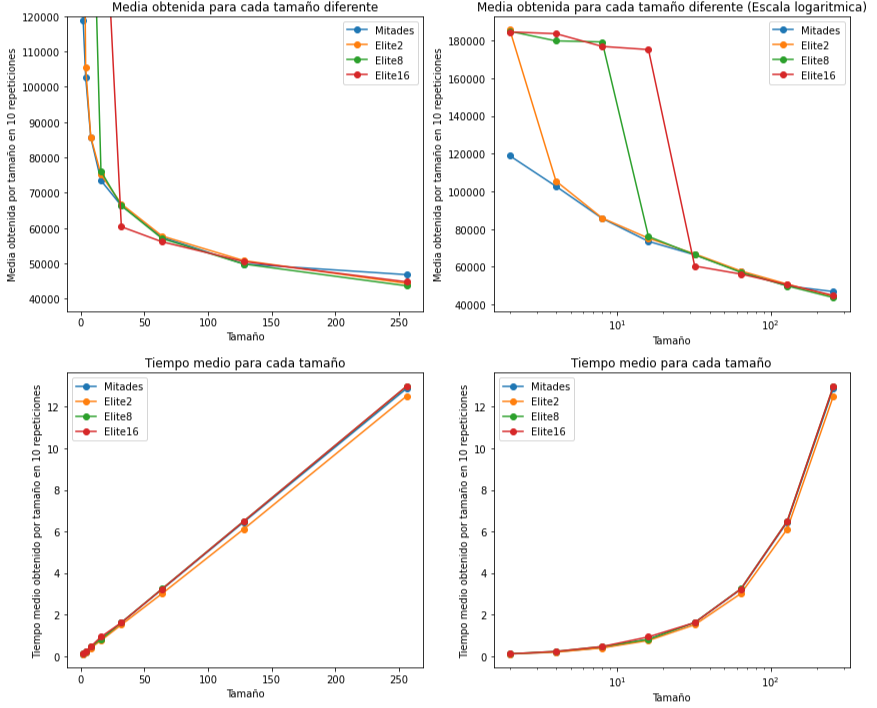

Los resultados, manteniendo las 2, 8 y 16 mejores soluciones en la población para los diferentes tamaños, son prácticamente los mismos que con el mecanismo anterior. Para tamaños menores o iguales que 2, 8 y 16, el algoritmo devolverá las soluciones iniciales, al quedarse con las elite-mejores.

El mecanismo de reemplazo elitista genera mucha mayor diversidad que el reemplazo por mitades, por lo que es capaz de evitar mínimos locales en los que el otro mecanismo se puede quedar atascado. Sin embargo, el mecanismo elitista, en un principio es menos explotador que el mecanismo de mitades, por lo que, **para un número pequeño de iteraciones, como 250 o 300, será mejor utilizar mitades**, ya que encontraremos una solución mejor. **Para un número de iteraciones medio, por ejemplo, 500, que es lo que se utiliza para realizar las gráficas anteriores, será irrelevante el mecanismo utilizado**. **Para un número mayor lo mejor sería utilizar elitismo**, para evitar mínimos locales.

La siguiente experimentación buscará los mejores valores de probabilidad de mutación, teniendo en cuenta que tenemos dos mecanismos para realizarla. Mientras que en el primer mecanismo los genes resultantes solo tendrán una posición modificada, coincidiendo mucho con su padre, en la segunda pueden discernir en más de un gen, lo que diversificará más la población. No podemos trabajar en los mismos rangos de probabilidades para ambos mecanismos:

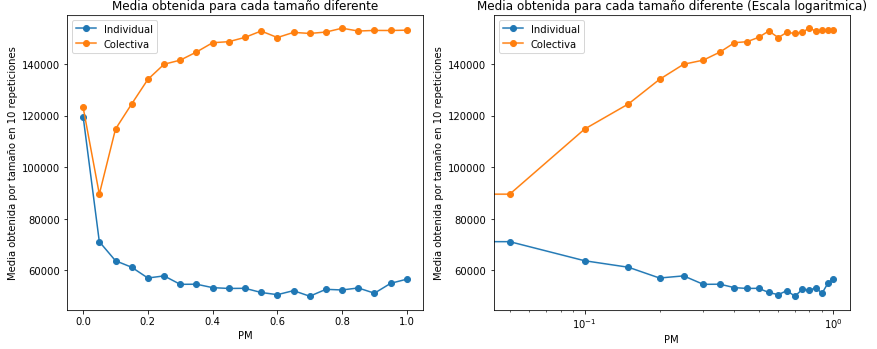

Probabilidades muy elevadas para el mecanismos de mutación cromosómica generan un algoritmo aleatorizado, que pierde la metaheurística. Así, probaremos con valores entre 0 y 1 para la mutación individual y entre 0 y 0.03 para la mutación cromosómica:

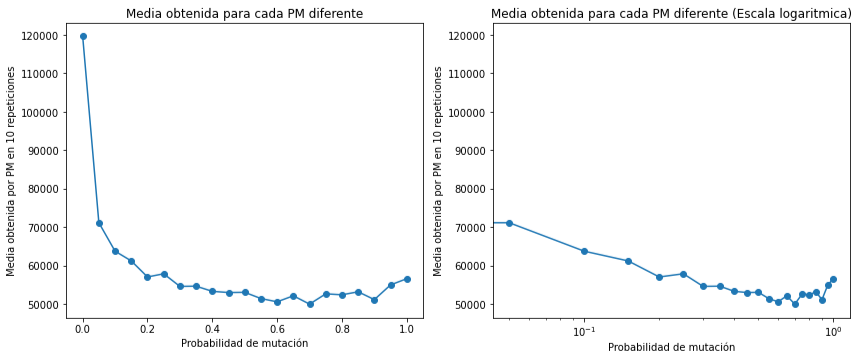

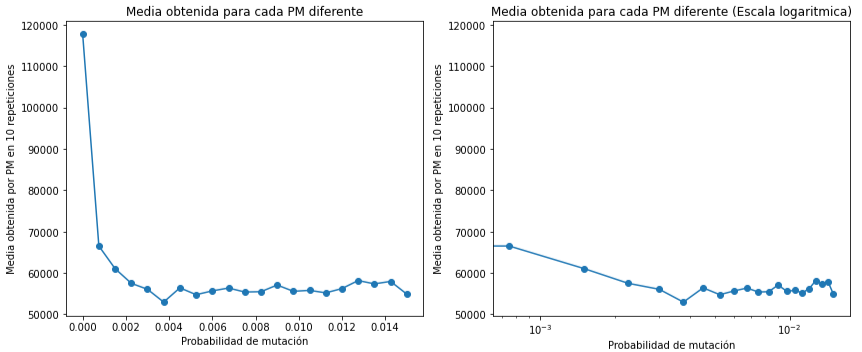

La primera gráfica se corresponde con la mutación individual y la segunda con la cromosómica. En ambos casos el dibujo es muy similar. Tenemos un primer descenso muy rápido, mostrando como la mutación es una operación necesaria y muy beneficiosa en los algoritmos genéticos. Después resultados ligeramente mejores o peores, que se pueden deber a la propia aleatoriedad de la ejecución; y al final, en la primera gráfica, un ascenso del coste por el exceso de mutación (que perjudica a la explotación). Debemos tener cuidado con las probabilidades de mutación, ya que pueden empeorar el algoritmo. Si representamos el dibujo de ambos mecanimos en la misma gráfica, haciendo como si los valores de probabilidades de la cromosómica fuesen los mismos que los de la individual, obtenemos el siguiente gráfico:

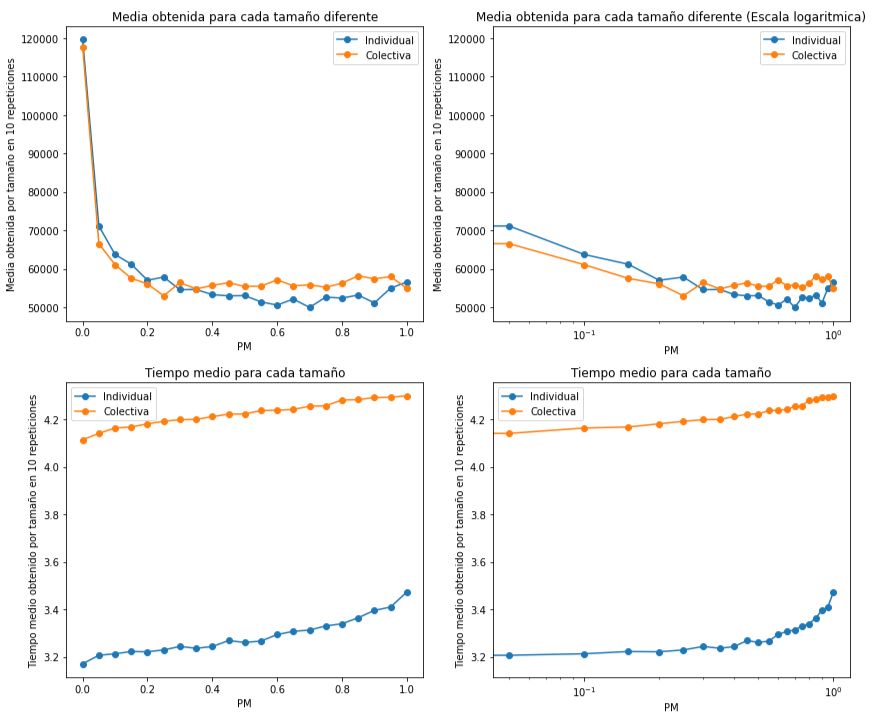

El rendimiento de ambos mecanismos es prácticamente el mismo. **Ligeramente mejor el de la mutación individual. Será mejor utilizar esta para valores de iteraciones pequeñas, ya que su coste temporal es menor**, porque no existe el overhead de recorrer todo el cromosoma. **Para valores de iteraciones altos, lo mejor será utilizar la mutación cromosómica, ya que proporciona mayor diversidad, y por lo tanto, exploración, evitando los mínimos locales.**. Cuantas más mutaciones se hacen, mayor es el coste temporal, pero un intercambio es una operación poco costosa.  Es importante también tener cuidado con el valor de la probabilidad de mutación para la mutación cromosómica, ya que sí es demasiado grande si que se harían muchos intercambios, y el coste temporal podría aumentar drásticamente. 

En cuanto a los valores recomendados para la mutación, basándose en la gráfica, el mejor valor **para la mutación individual sería de 0.6 o 0.7; y para la mutación cromosómica de 0.0035**

La última experimentación consistirá en analizar como afecta al rendimiento y al tiempo el aumento del número de iteraciones del algoritmo. Probaremos con iteraciones desde 50 hasta 1000 con 6 valores diferentes de iteraciones:

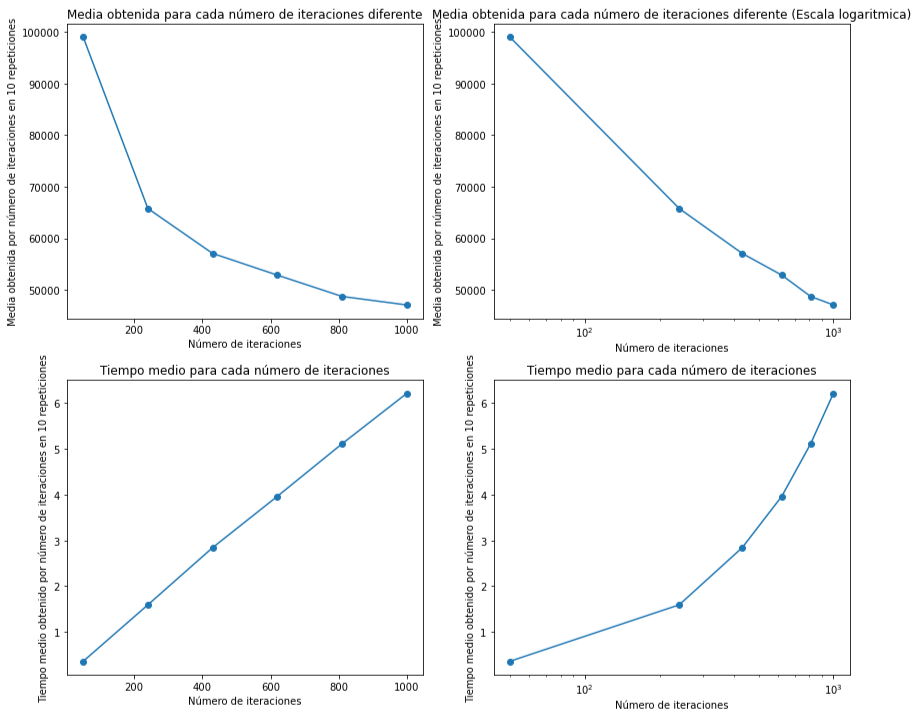

In [96]:
tabla_mejora(np.linspace(50.0,1000.0,num=6).tolist(), ["Tamaño", "Media", "Mejora sobre anterior", "Mejora sobre primero", "Tiempo medio"], 10, 'soluciones_totales_iteraciones.pkl')

| Tamaño | Media | Mejora sobre anterior | Mejora sobre primero | Tiempo medio |
| --- | --- | --- | --- | --- |
| **50.0** | 99047.692 | 1.0 | 1.0 | 0.36 |
| **240.0** | 65789.583 | 1.506 | 1.506 | 1.594 |
| **430.0** | 57077.913 | 1.153 | 1.735 | 2.843 |
| **620.0** | 52871.436 | 1.08 | 1.873 | 3.964 |
| **810.0** | 48735.773 | 1.085 | 2.032 | 5.111 |
| **1000.0** | 47087.306 | 1.035 | 2.103 | 6.213 |


Cuando hablamos de pocas iteraciones (6 o 7 segundos), como ya se adelantaba en el aumento del tamaño de la población, al aumentar las iteraciones mejoraremos los resultados, ya que hay más exploración y explotación. Hasta aquí lo que se puede observar en la gráfica, aumentando el coste temporal también a cada paso. Sin embargo, cuando tratamos con un mayor número de iteraciones, el hecho de aumentar las iteraciones no necesariamente mejorará el valor del coste mínimo encontrado, ya que si hay convergencia en un mínimo local, la mayor parte de las iteraciones serán ejecutadas en vano. 

**Si queremos que el algoritmo se ejecute rápidamente lo mejor será tener un número de iteraciones de entre 500 y 700.** Con menos, no damos tiempo suficiente de exploración y explotación.

Cuando queremos encontrar las mejores soluciones posibles, independientemente del tiempo que tarde el algoritmo, debemos utilizar un número de iteraciones muy grande, acompañado de los parámetros en cuestión de mutación, tamaño de población y reemplazo que más favorecen a la exploración del espacio de búsqueda, ya que solo así podremos evitar convergencia en mínimos locales y seguir obteniendo mejores resultados a medida que avance el algoritmo. Además, el mejor mecanismo de selección a utilizar será el más aleatorio de los propuestos (el que tenga menor presión selectiva), que será el que más favorezca a la exploración. Este es el mecanismo de torneo. De todas formas, probablemente un algoritmo genético no es la opción a escoger si lo que queremos obtener es la mejor solución, ya que con estos cambios lo único que hacemos es favorecer a la aleatoriedad frente a la metaheurística. Hay otras metaheurísticas que se centran más en obtener la mejor solución, y no en encontrar rápidamente una solución aceptable. 

Así, en general, los parametros a escoger según nuestra intención:

|Parametros|Compromiso tiempo-solucion|Mejor solucion|
|--|--|--|
|Tamaño poblacion| 64 | 512|
|Mecanismo reemplazo| Mitades | Elitismo elite=2|
|Probabilidad de mutación| 0.6| 0.0035|
|Mecanismo de mutación| Individual|Cromosomica|
|Número de iteraciones|500-700|10000 o más|
|Mecanismo de seleccion|lineal (o cualquiera)| torneo o aleatorio|

**LAS MEJORES SOLUCIONES OBTENIDAS HAN SIDO**

|Objetivo|Coste solucion|Tiempo|
|--|--|--|
|Compromiso|40901.94242107648| 0:00:04|
|Mejor solución|29835.178423226684|1:13:11|

**Solucion Compromiso:** (8, 56, 7, 19, 20, 111, 9, 60, 34, 49, 17, 103, 96, 88, 104, 46, 48, 97, 57, 108, 33, 85, 95, 54, 112, 87, 5, 72, 31, 73, 70, 25, 92, 117, 52, 23, 41, 24, 26, 62, 63, 75, 21, 55, 28, 93, 65, 86, 47, 27, 3, 53, 64, 110, 113, 14, 11, 58, 18, 66, 1, 106, 115, 67, 12, 15, 118, 116, 29, 6, 45, 30, 44, 102, 76, 39, 61, 98, 99, 94, 35, 105, 40, 38, 43, 32, 10, 107, 114, 80, 78, 13, 83, 69, 82, 2, 84, 37, 74, 42, 4, 50, 59, 16, 36, 71, 89, 119, 109, 81, 91, 51, 79, 101, 68, 90, 100, 22, 77)

**Solución Mejor Solucion:**(59, 16, 3, 93, 111, 60, 34, 49, 96, 46, 108, 57, 97, 48, 33, 104, 103, 25, 17, 92, 52, 117, 23, 26, 14, 84, 2, 78, 89, 82, 37, 110, 113, 11, 62, 75, 63, 24, 41, 67, 12, 61, 66, 50, 74, 69, 83, 91, 10, 68, 22, 107, 71, 99, 98, 56, 7, 20, 19, 15, 115, 118, 87, 112, 85, 95, 54, 72, 5, 106, 1, 94, 35, 40, 13, 80, 114, 100, 90, 32, 43, 101, 79, 51, 119, 8, 38, 105, 36, 18, 116, 39, 6, 45, 30, 44, 102, 76, 29, 31, 88, 73, 70, 9, 47, 21, 55, 86, 27, 65, 28, 58, 64, 53, 4, 42, 81, 109, 77)


#### Respuestas y evaluación

Recordatorio: No olvides escribir tu nombre y apellidos en la segunda celda de este documento.
La respuestas a las preguntas deben venir acompañadas de las implementaciones necesarias para su respuesta.

*P3.1: Implementación básica* (5 puntos)

La implementación básica se evaluará mediante un cuestionario automático de evaluación. Este lo realizarás en la primera sesión tras la entrega, y se centrará en la resolución por tu parte de diversas cuestiones prácticas relacionadas con la implementación realizada, pudiendo ser necesaria la ejecución, adaptación y modificación de la misma. 

Pregunta 1.

Independientemente del cuestionario automático de evaluación, considera siempre que las preguntas planteadas en el notebook deben ser respondidas también. Esas preguntas generales están diseñadas para formarte, y te servián para razonar y reflexionar sobre el tema, así como también para fomentar una discusión constructiva con los docentes en caso de dudas.


*P3.2: Laboratorio* (5 puntos)

Pregunta 2.

Pregunta 3.

Pregunta 4.

El informe a elaborar no debe exceder la longitud máxima de 1200 palabras.

Aclaraciones: La evaluación de esta parte se llevará a cabo en términos de la completitud y correctitud del laboratorio implementado, así como de la calidad del propio informe, que debe ser conciso y preciso, pudiendo acompañarse de gráficas y tablas que faciliten y fundamenten la explicación e argumentación. Es muy importante explicar de manera clara, precisa y fundamentada. Se reservará hasta un punto que se asignará en términos de la calidad de la mejor solución obtenida entre el conjunto de las prácticas entregadas (es por ello que no debes olvidar marcar en tu informe muy claramente cuál ha sido tu mejor solución y con qué configuración/versión).



<h1> Prueba 100000 iteraciones </h1>

In [105]:
solucion = busqueda_genetica(100000, 256, g2, 0.005, 0.95, MITAD=False, elite=2, TODOS=True, DEBUG=True)
print(solucion)
print(solucion, funcion_coste(solucion, g2))

Overall Progress:   0%|          | 0/100000 [00:00<?, ?it/s]

163618.621288557 0
160023.79144263495 1
149220.55581301163 2
146023.17870550213 3
145224.39524196574 5
141444.68187607639 6
138804.7079242319 7
136191.5097141402 8
132505.80127363073 10
131964.36779150134 11
130950.00628913226 16
125327.81464066434 17
121604.7639965012 18
120955.66723306071 22
115857.66345656622 24
115765.24280313416 31
115660.25501113334 32
113676.00533961158 35
113055.18376685111 37
112689.80410021615 39
112443.68219928921 41
106558.77625571845 42
106524.56716635295 45
105835.15687083968 46
104924.08135351223 48
104174.28046273706 53
104061.04958027274 54
102474.42472851294 55
100197.32723579499 59
99304.38716977798 60
98565.90024776288 73
96511.58027831842 74
96247.24862404272 81
95949.17440379648 86
95895.36588829238 88
91697.07478726345 90
89848.59939421223 93
89320.01063422098 97
87234.73378426273 108
87032.00447083153 110
86701.07111937468 113
86384.0681946482 114
86373.25541930654 136
85370.95683066797 140
84726.34518335696 147
84023.58930098648 155
83287.84382

In [106]:
funcion_coste((8, 56, 7, 19, 20, 111, 9, 60, 34, 49, 17, 103, 96, 88, 104, 46, 48, 97, 57, 108, 33, 85, 95, 54, 112, 87, 5, 72, 31, 73, 70, 25, 92, 117, 52, 23, 41, 24, 26, 62, 63, 75, 21, 55, 28, 93, 65, 86, 47, 27, 3, 53, 64, 110, 113, 14, 11, 58, 18, 66, 1, 106, 115, 67, 12, 15, 118, 116, 29, 6, 45, 30, 44, 102, 76, 39, 61, 98, 99, 94, 35, 105, 40, 38, 43, 32, 10, 107, 114, 80, 78, 13, 83, 69, 82, 2, 84, 37, 74, 42, 4, 50, 59, 16, 36, 71, 89, 119, 109, 81, 91, 51, 79, 101, 68, 90, 100, 22, 77), g2)

29835.178423226684

<h1> Prueba compromiso tiempo-solucion </h1>

In [114]:
mejor = genera_poblacion_inicial(1, g2)[0][0]
mejor_coste = funcion_coste(mejor, g2)
for i in range(100):
    solucion = busqueda_genetica(700, 64, g2, 0.6, 0.95, MITAD=True, TODOS=False, DEBUG=False)
    coste= funcion_coste(solucion,g2)
    if coste<mejor_coste:
        mejor = solucion
        mejor_coste = coste
        print(mejor_coste)
        
print(mejor)
print(mejor_coste)

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

52848.95804420326


Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

40901.94242107648


Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]

[59, 16, 3, 93, 111, 60, 34, 49, 96, 46, 108, 57, 97, 48, 33, 104, 103, 25, 17, 92, 52, 117, 23, 26, 14, 84, 2, 78, 89, 82, 37, 110, 113, 11, 62, 75, 63, 24, 41, 67, 12, 61, 66, 50, 74, 69, 83, 91, 10, 68, 22, 107, 71, 99, 98, 56, 7, 20, 19, 15, 115, 118, 87, 112, 85, 95, 54, 72, 5, 106, 1, 94, 35, 40, 13, 80, 114, 100, 90, 32, 43, 101, 79, 51, 119, 8, 38, 105, 36, 18, 116, 39, 6, 45, 30, 44, 102, 76, 29, 31, 88, 73, 70, 9, 47, 21, 55, 86, 27, 65, 28, 58, 64, 53, 4, 42, 81, 109, 77]
40901.94242107648
